# **HW5 (20 Points): Required Submissions:**
1.  Submit  colab/jupyter notebooks.
2. There are two Questions with different datasets.
3. **You do not need to do EDA again. You can use the EDA from last HW. We are using the same datasets as in the last HW.**

2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided).
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw6, FirstName_file2_h6, FirstName_file3_h6, FirstName_file4_h6**

# Question1 (10 Points) : Classification on the ‘credit-g’ dataset using SVM.

- **Use RandomSerachCV(OR Halving GridsearchCV, HalvingRandomSerachCV) for this problem**.
- Try poly and rbf kernels in the same pipeline.

Compare KNN and Logistic Regression/SVM.(previous HWs),  Basd on your anaysis which algorithm you will recommend.

# Download Data:
You can download the dataset using the commands below  and see it’s description at https://www.openml.org/d/31

### Attribute description from https://www.openml.org/d/31

1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

In [5]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [6]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import feature_engine
import sklearn

In [8]:
# Import packages for data manipulation and mathematical operations
import pandas as pd  # For data manipulation using dataframes
import numpy as np  # For mathematical operations

import warnings
warnings.filterwarnings("ignore")

# Import packages for data visualization
import matplotlib.pyplot as plt  # For basic plots
import seaborn as sns  # For more advanced plots
import scipy.stats as stats  # For statistical tests and transformations
import statsmodels.api as sm
# To display plots inline in Jupyter Notebooks
%matplotlib inline

# Import packages for saving and loading machine learning models
import joblib  # To save and load ML models

# Import packages for file and system operations
from pathlib import Path  # For OS-agnostic file paths
import sys  # For system-specific parameters and functions

# Import packages for data splitting and model evaluation
from sklearn.model_selection import train_test_split  # For data splitting
from sklearn.model_selection import StratifiedKFold  # For stratified cross-validation
from sklearn.model_selection import KFold  # For simple cross-validation
from sklearn.model_selection import StratifiedShuffleSplit

# Import packages for data preprocessing
from feature_engine.encoding import OneHotEncoder  # For one-hot encoding categorical variables
from feature_engine.encoding import RareLabelEncoder  # For encoding rare labels
from sklearn.preprocessing import StandardScaler  # For standardizing numerical variables

# Import packages for building pipelines
from sklearn.pipeline import Pipeline  # For creating pipelines

# Import packages for hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # For grid search cross-validation

# Import packages for machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification

# Import packages for fetching datasets
from sklearn.datasets import fetch_openml  # To fetch datasets from OpenML

# Import packages for feature transformations
from feature_engine.transformation import LogTransformer  # For logarithmic transformations
from feature_engine.wrappers import SklearnTransformerWrapper  # To use scikit-learn transformers within feature-engine

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from feature_engine.selection import DropFeatures
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV

In [9]:
base_folder = Path('/content/drive/MyDrive/BUAN6341/HW6')

In [10]:
save_model_folder = base_folder/'models/machine_learning'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
sys.path.append(str(custom_function_folder))

In [13]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/BUAN6341/HW6/custom-functions']

In [14]:
from  plot_learning_curve import plot_learning_curve

In [15]:
from eda_plots import diagnostic_plots, plot_target_by_category

In [16]:
from sklearn.datasets import fetch_openml

In [17]:
# Load data from  https://www.openml.org/d/31
X, y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

In [18]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [19]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['bad', 'good']

In [20]:
# CODE HERE
X.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,4.0,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,2.0,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,4.0,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,2.0,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes


In [21]:
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [23]:
X.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
dtype: int64

In [24]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [25]:
duplicates = X.duplicated()

print(duplicates.any())

print(X[duplicates])

False
Empty DataFrame
Columns: [checking_status, duration, credit_history, purpose, credit_amount, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, age, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker]
Index: []


In [26]:
X.isnull().any()

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
dtype: bool

In [27]:
X.isnull().mean() * 100

checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
dtype: float64

In [28]:
categorical = [var for var in X.columns if X[var].dtype.name == 'category']

discrete = [var for var in X.columns if X[var].dtype.name != 'category' and len(X[var].unique()) < 20]

continuous = [var for var in X.columns if X[var].dtype.name != 'category' and var not in discrete]

In [29]:
continuous

['duration', 'credit_amount', 'age']

In [30]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [31]:
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

In [32]:
X[categorical].head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes


In [33]:
checking_status_freq = 100 * X['checking_status'].value_counts(normalize = True)
print(checking_status_freq)

no checking    39.4
<0             27.4
0<=X<200       26.9
>=200           6.3
Name: checking_status, dtype: float64


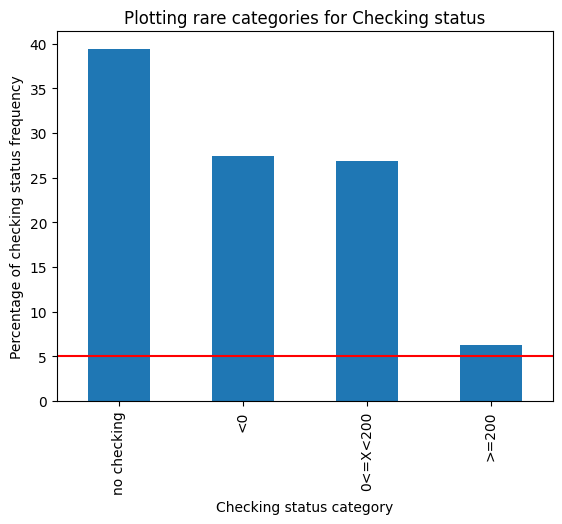

In [34]:
rare_cs_plot = checking_status_freq.sort_values(ascending=False).plot.bar()
rare_cs_plot.axhline(y=5, color='red')
rare_cs_plot.set_ylabel('Percentage of checking status frequency')
rare_cs_plot.set_xlabel('Checking status category')
rare_cs_plot.set_title('Plotting rare categories for Checking status')
plt.show()

In [35]:
def check_rare_categories(df, var):

    frequencies = 100 * df[var].value_counts(normalize=True)

    fig = frequencies.sort_values(ascending=False).plot.bar()

    fig.axhline(y=5, color='red')

    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title(f'Identifying Rare Categories for {var}')

    plt.show()

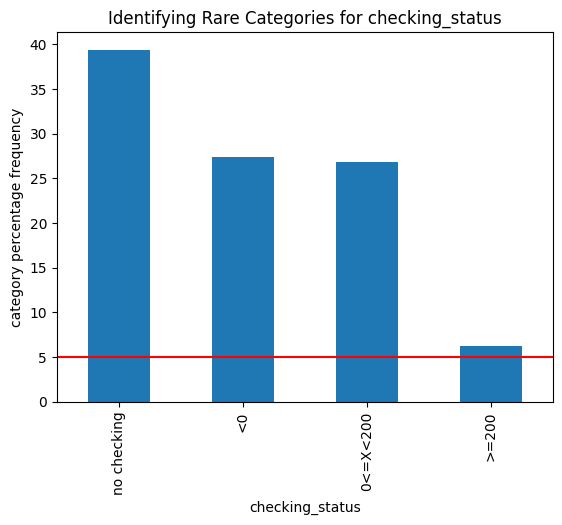

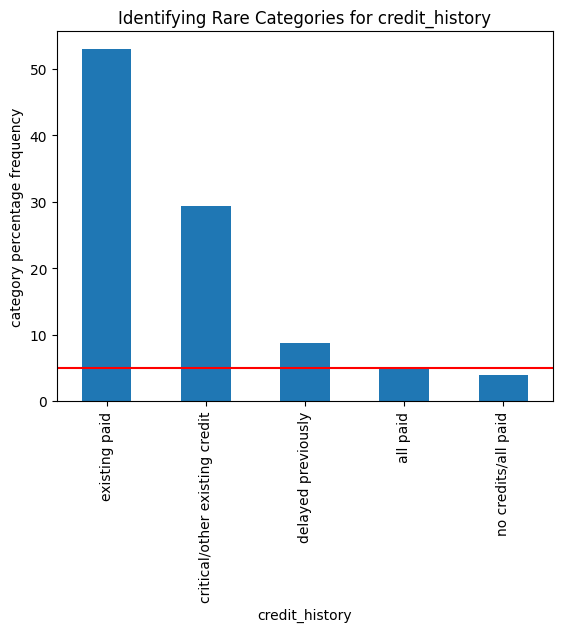

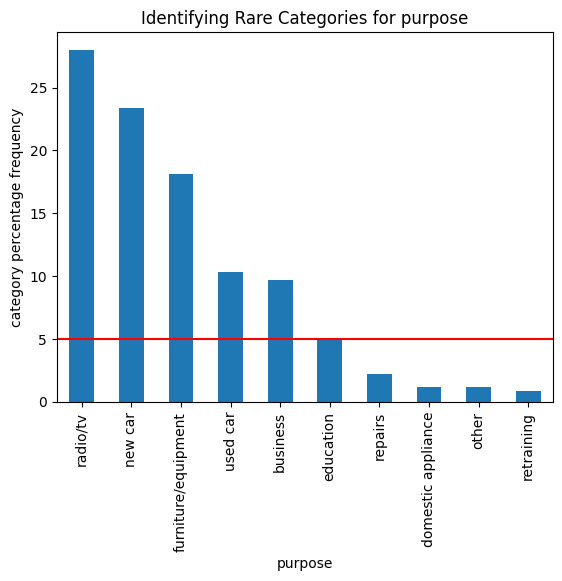

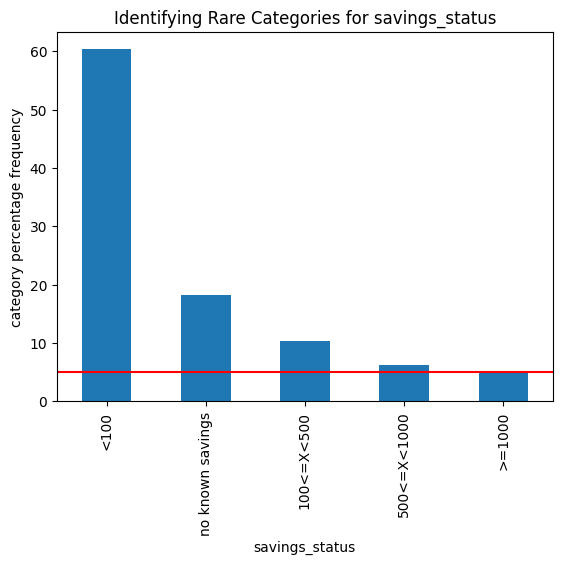

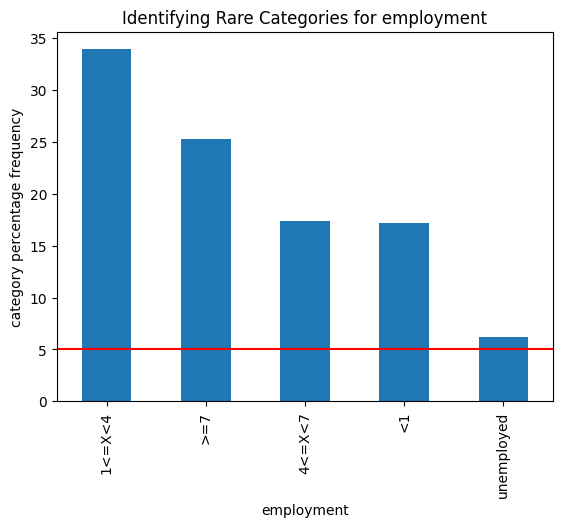

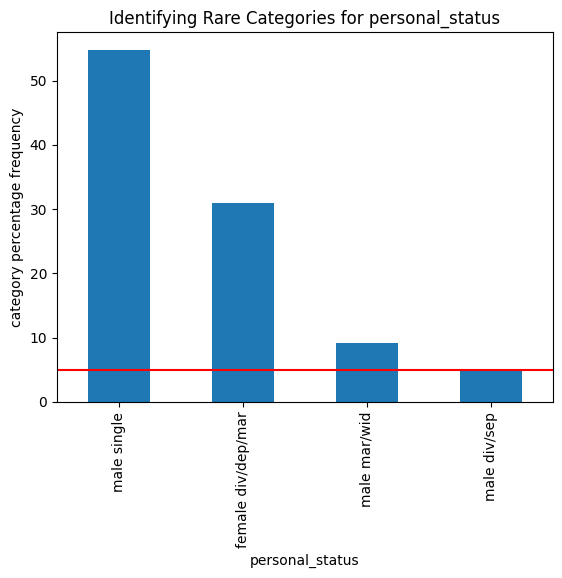

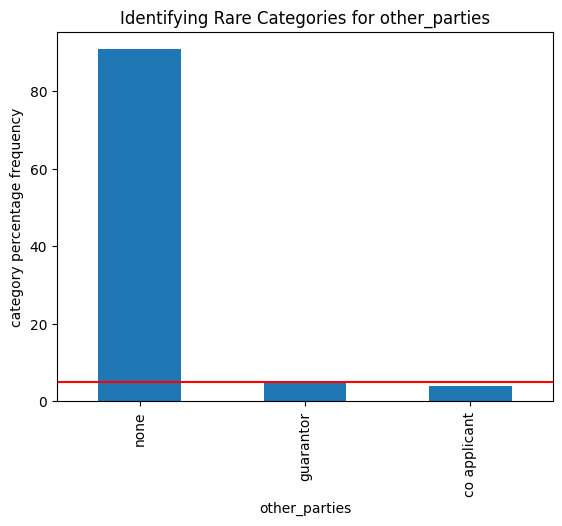

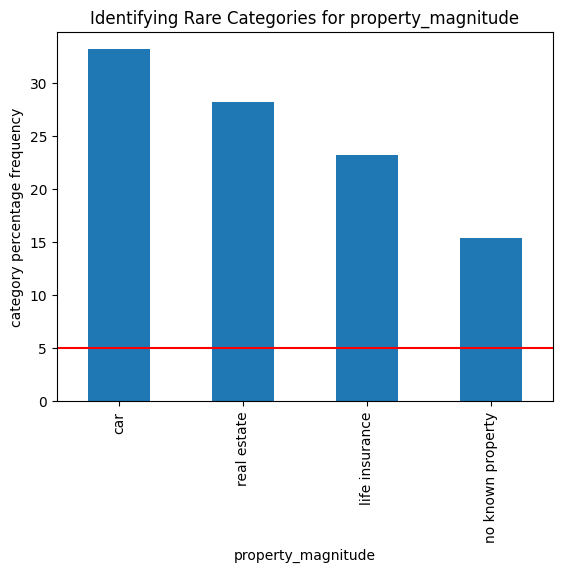

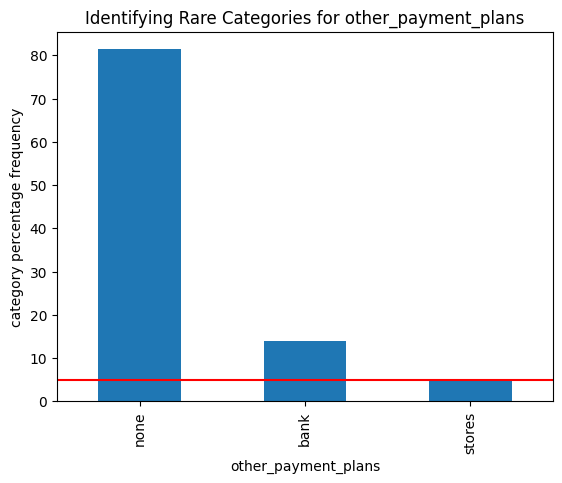

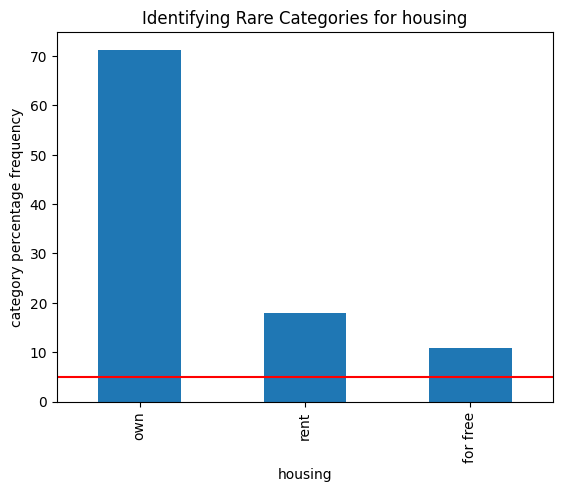

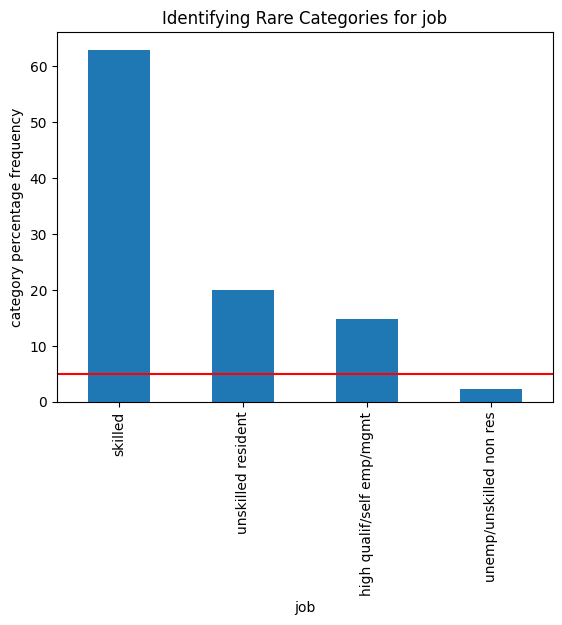

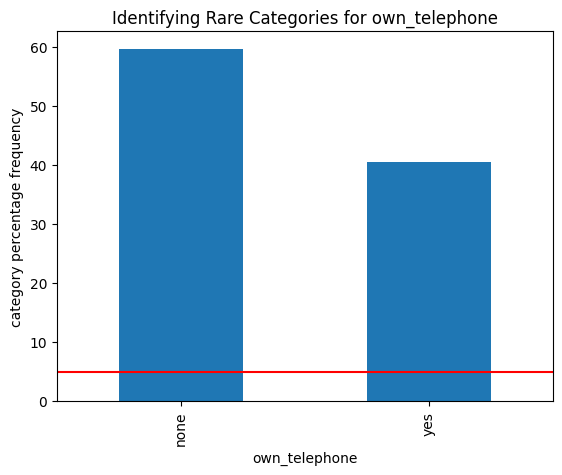

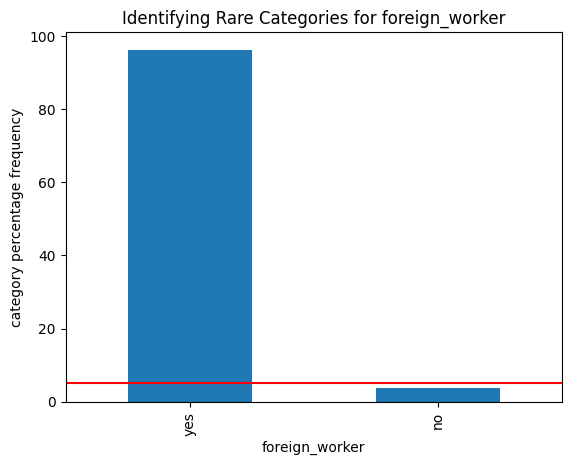

In [36]:
for var in categorical:
  check_rare_categories(X, var)

In [37]:
print(y.value_counts())

good    700
bad     300
Name: class, dtype: int64


In [38]:
print(f"{100 * y.value_counts(normalize = True)}")

good    70.0
bad     30.0
Name: class, dtype: float64


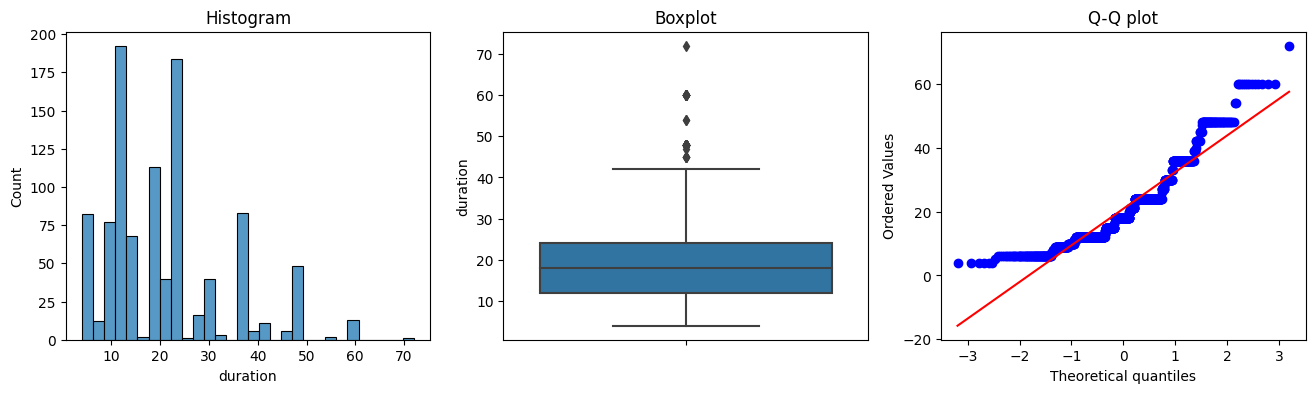

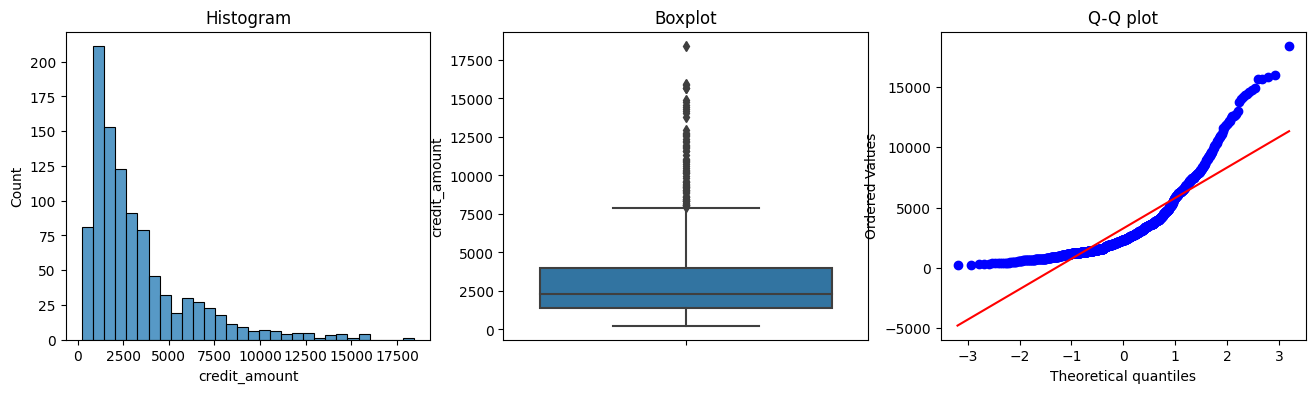

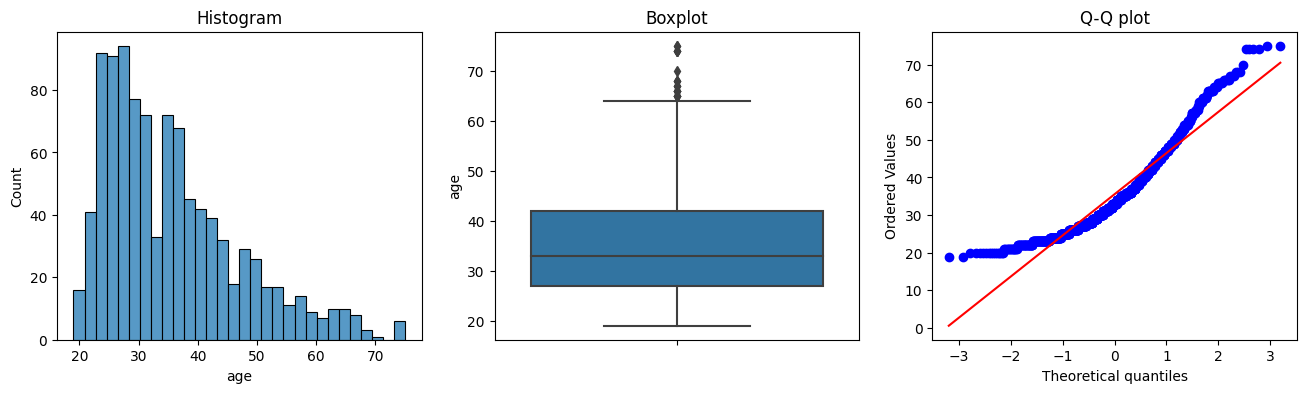

In [39]:
for var in continuous:
    diagnostic_plots(X, var)

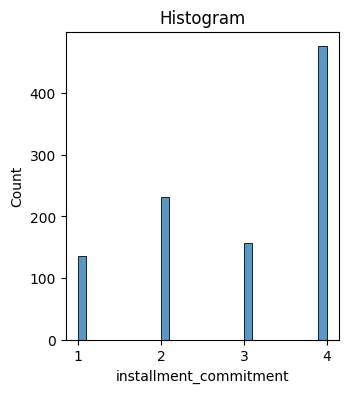

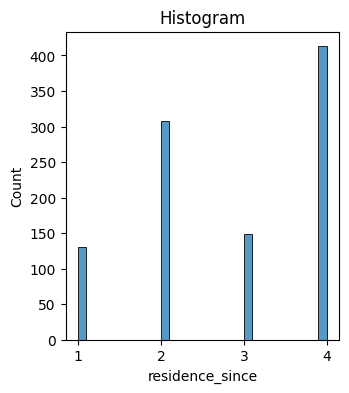

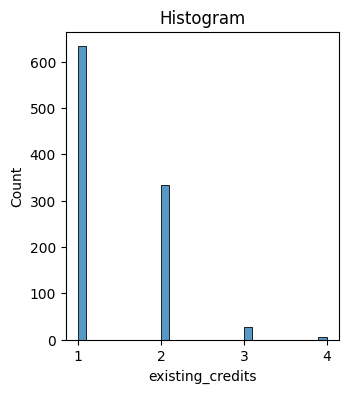

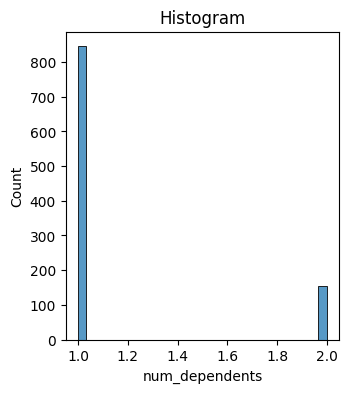

In [40]:
for var in discrete:
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 2)
  sns.histplot(X[var], bins = 30)
  plt.title('Histogram')

<Axes: >

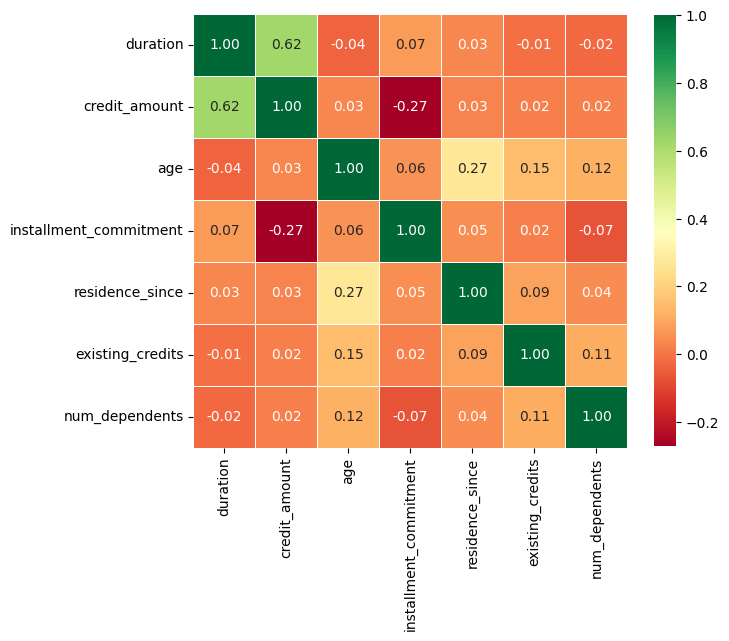

In [41]:
correlation_matrix = X[continuous + discrete].corr().round(2)
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(7, 7))
sns.heatmap(X[top_correlation_features].corr(), annot = True, square = True, fmt = '.2f', cbar_kws = {"shrink": .80}, linewidths = .5, cmap = 'RdYlGn')

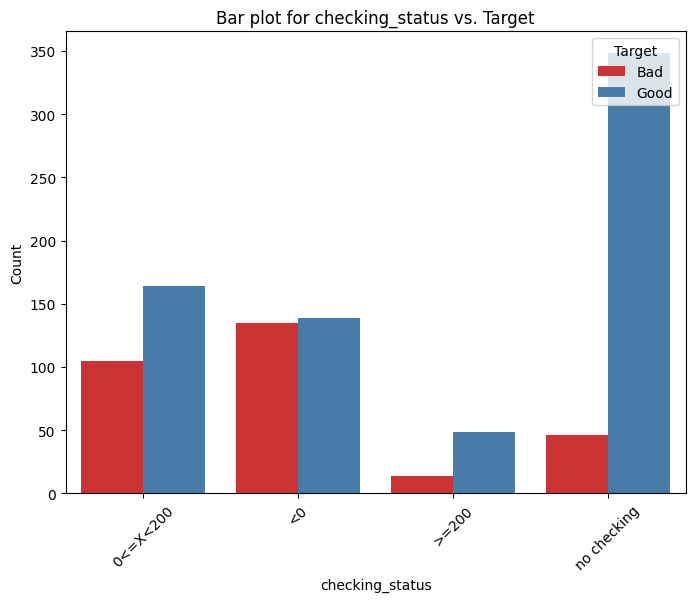

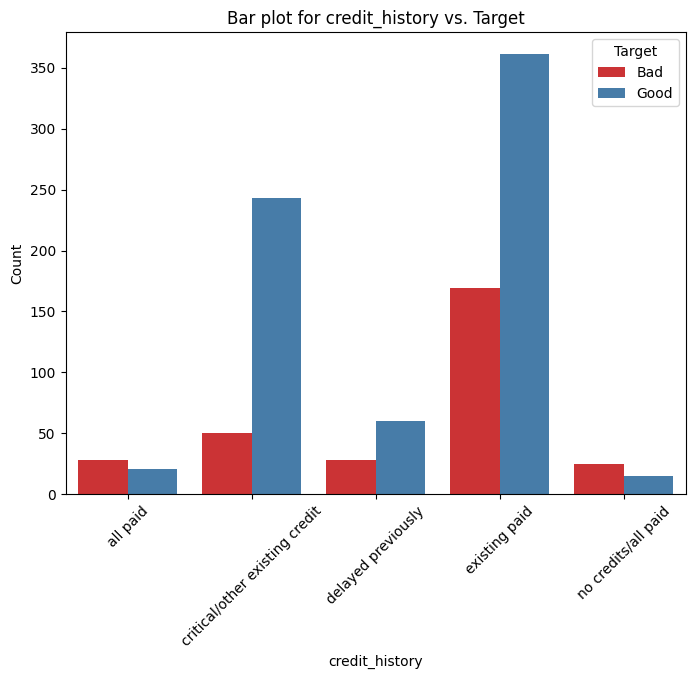

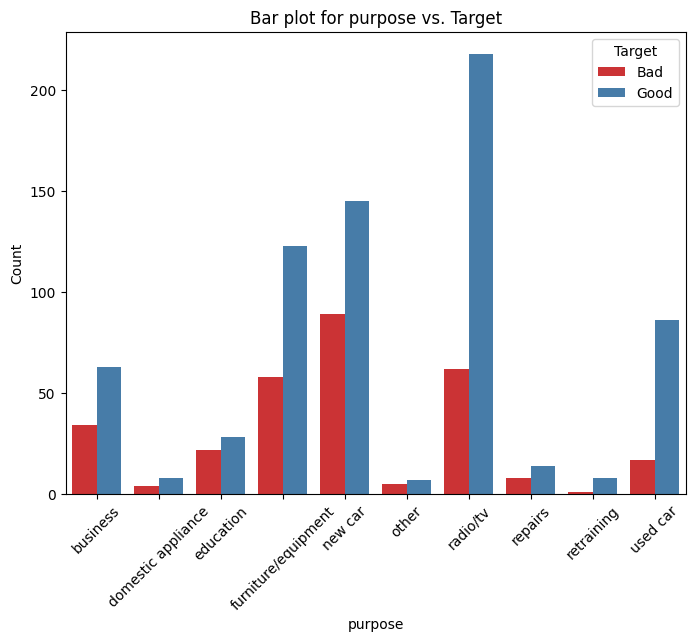

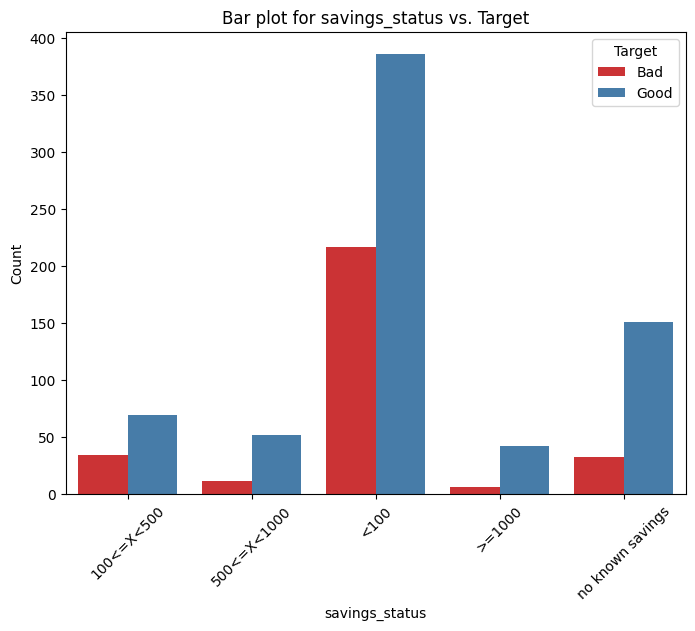

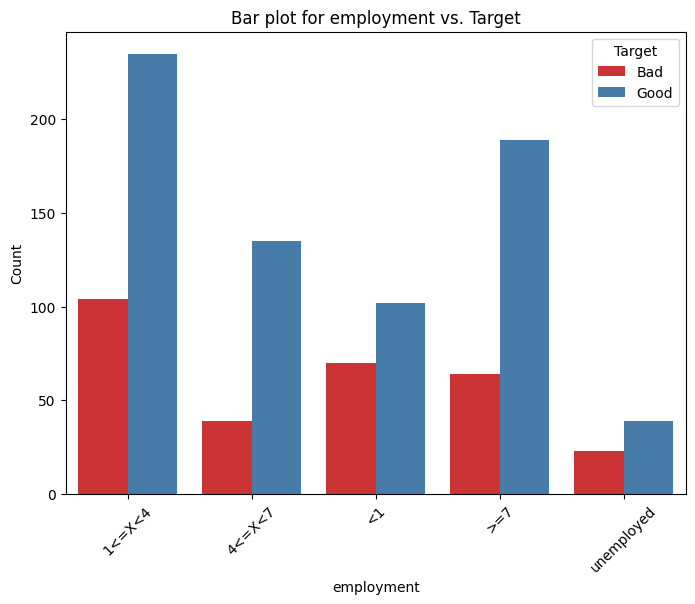

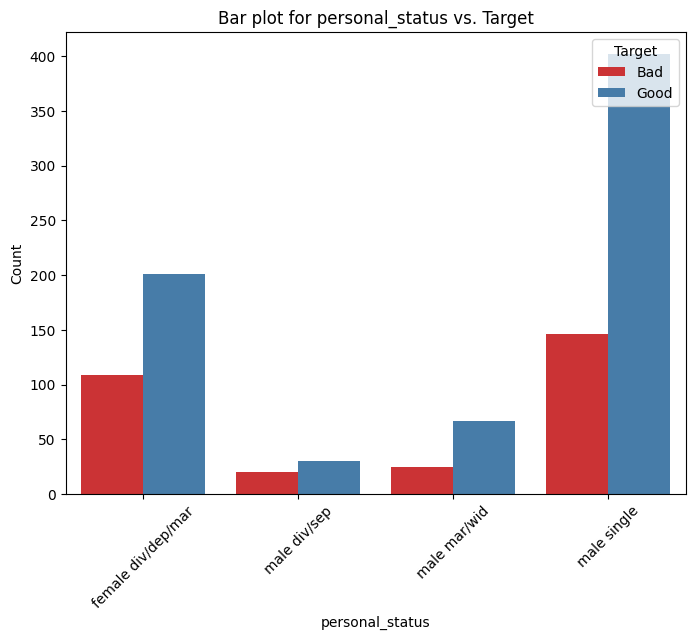

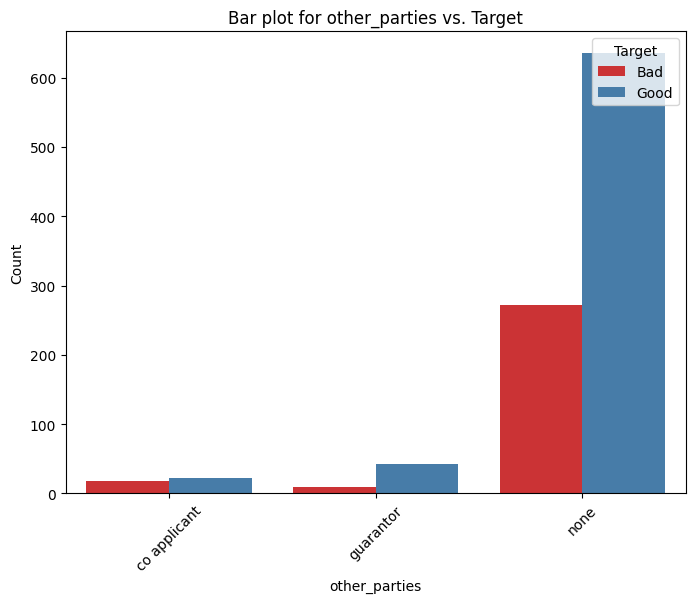

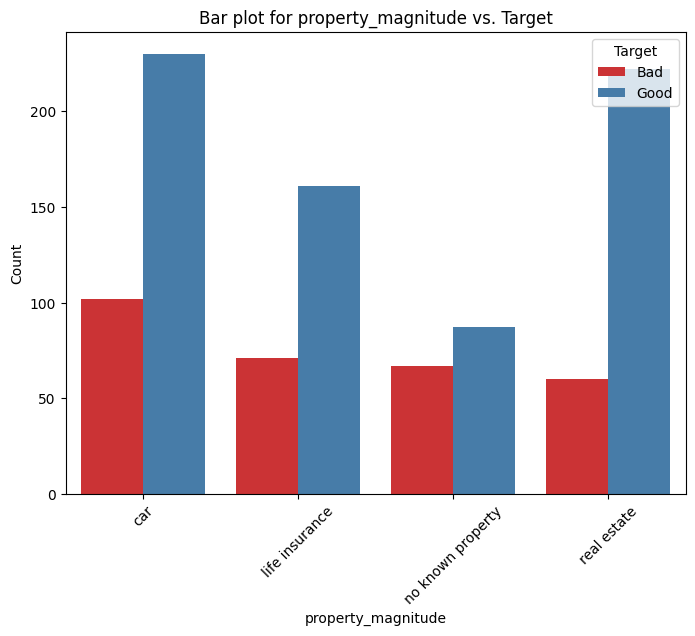

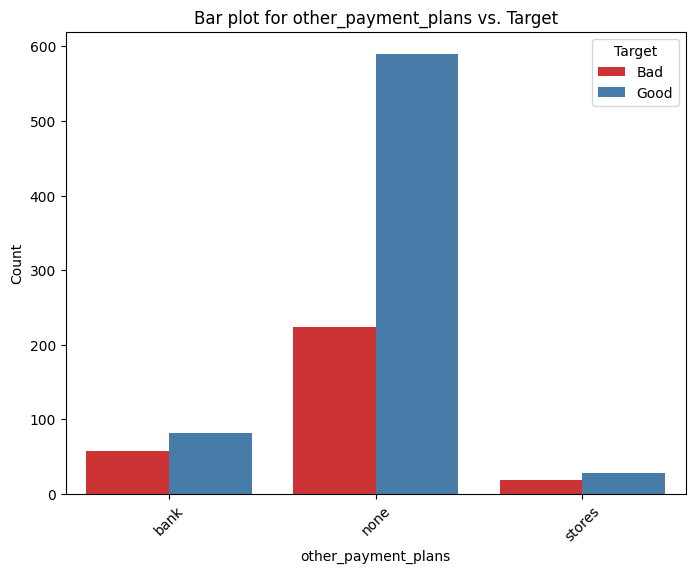

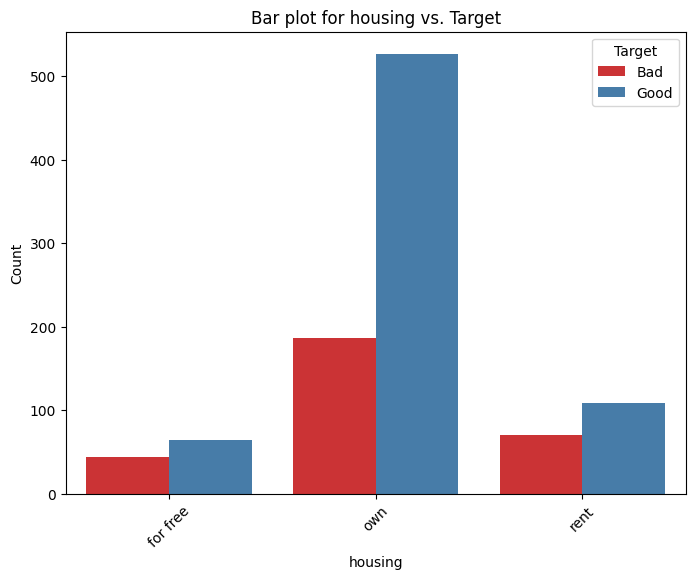

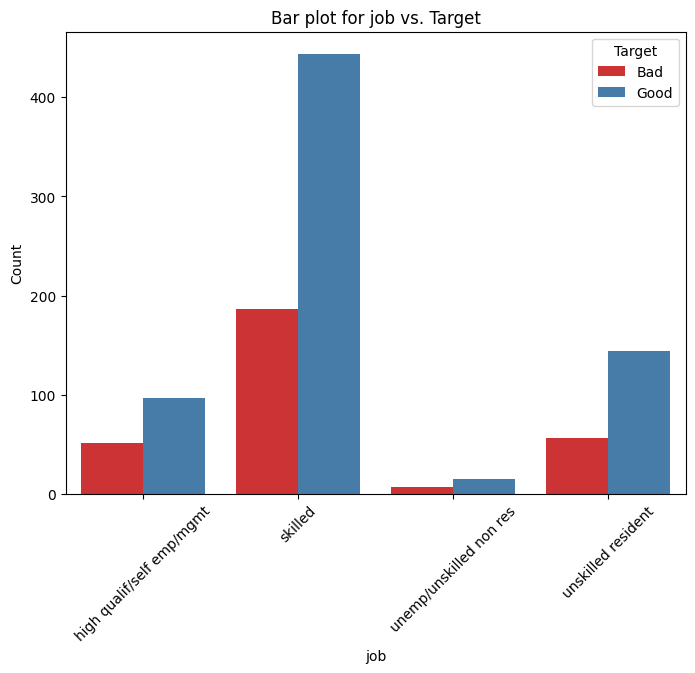

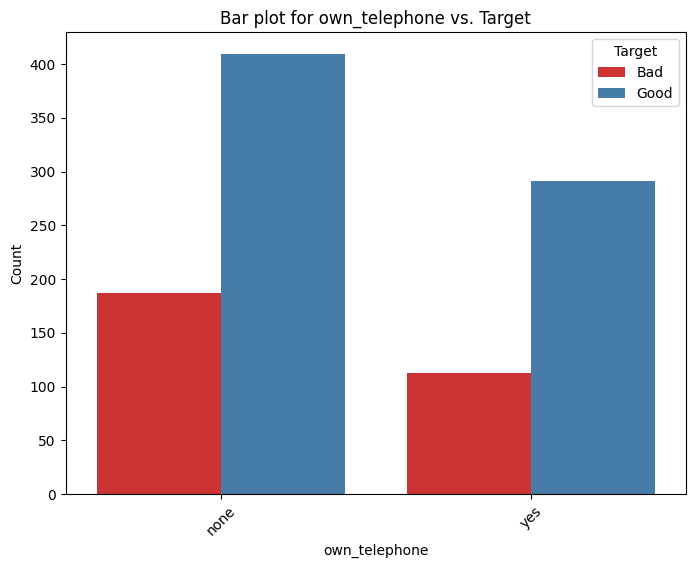

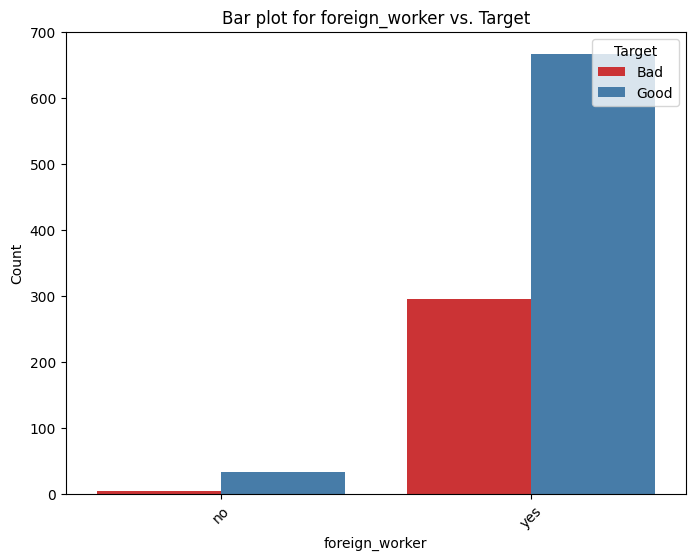

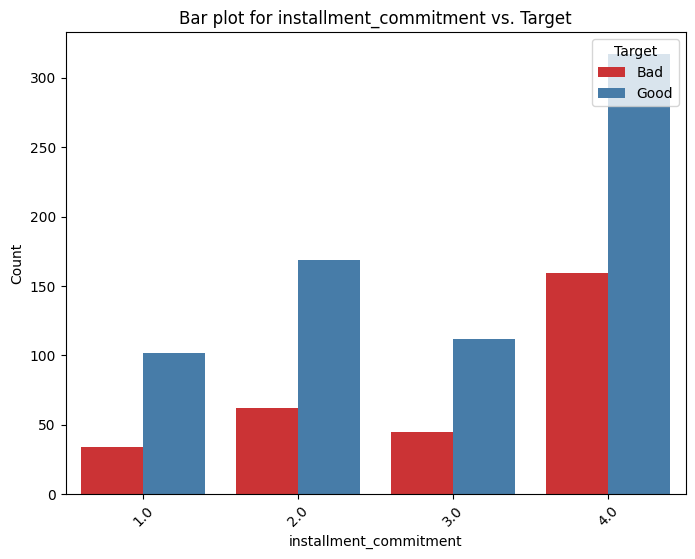

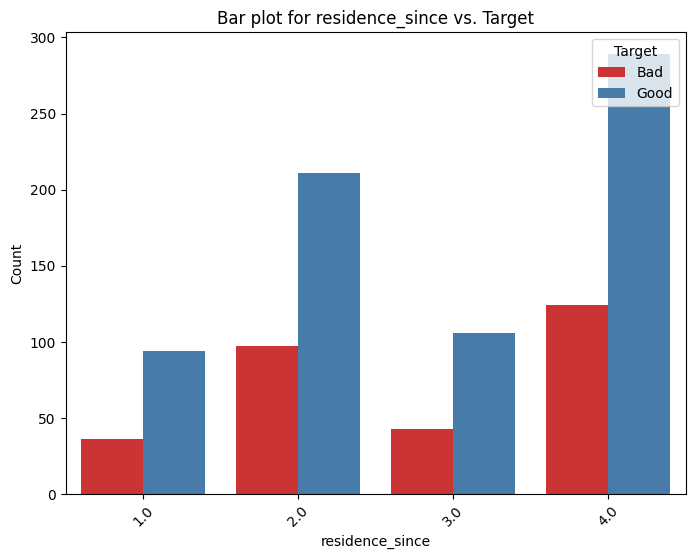

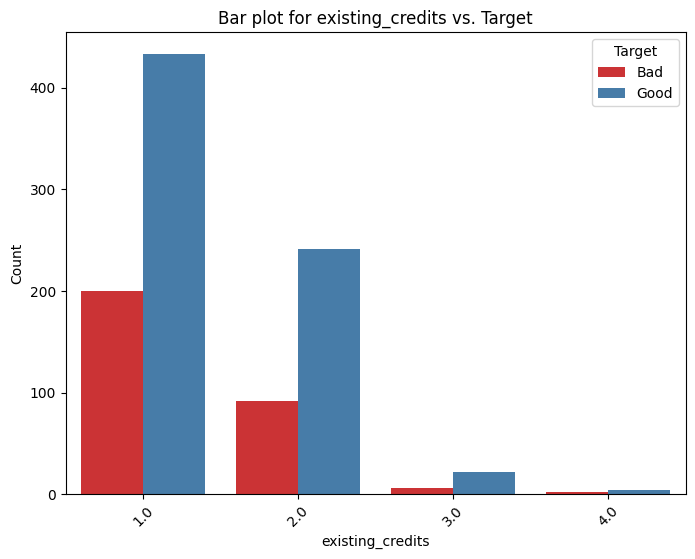

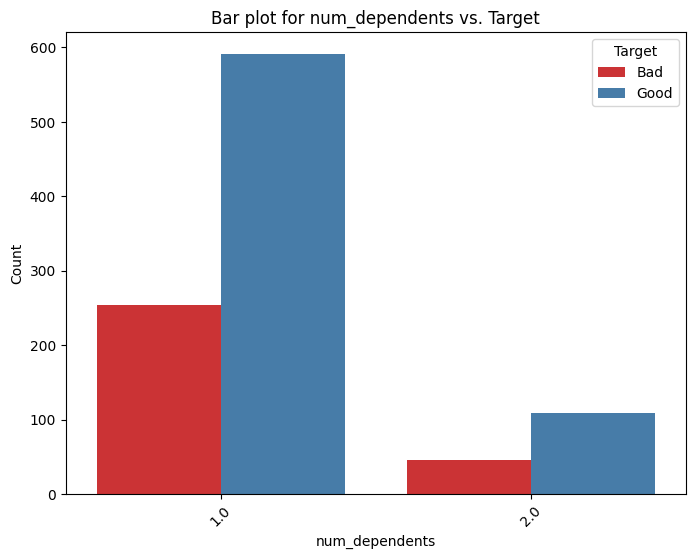

In [42]:
for var in categorical + discrete:
  plt.figure(figsize=(8, 6))
  sns.countplot(x = var, hue = y, data = X, palette = "Set1")
  plt.title(f"Bar plot for {var} vs. Target")
  plt.xlabel(var)
  plt.ylabel("Count")
  plt.legend(title = 'Target', loc = 'upper right', labels = ["Bad", "Good"])
  plt.xticks(rotation = 45)
  plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [44]:
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
82,no checking,18.0,existing paid,business,1568.0,100<=X<500,1<=X<4,3.0,female div/dep/mar,none,4.0,life insurance,24.0,none,rent,1.0,unskilled resident,1.0,none,yes
991,no checking,15.0,all paid,radio/tv,1569.0,100<=X<500,>=7,4.0,male single,none,4.0,car,34.0,bank,own,1.0,unskilled resident,2.0,none,yes
789,<0,40.0,critical/other existing credit,education,5998.0,<100,1<=X<4,4.0,male single,none,3.0,no known property,27.0,bank,own,1.0,skilled,1.0,yes,yes
894,no checking,18.0,critical/other existing credit,radio/tv,1169.0,no known savings,1<=X<4,4.0,male single,none,3.0,life insurance,29.0,none,own,2.0,skilled,1.0,yes,yes
398,0<=X<200,12.0,existing paid,new car,1223.0,<100,>=7,1.0,male div/sep,none,1.0,real estate,46.0,none,rent,2.0,skilled,1.0,none,yes


In [45]:
y_train

82     good
991    good
789     bad
894    good
398     bad
       ... 
106     bad
270    good
860    good
435     bad
102    good
Name: class, Length: 750, dtype: category
Categories (2, object): ['bad', 'good']

In [46]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')

Length of X_train: 750
Length of X_test: 250


In [47]:
print(f'Length of y_train: {len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of y_train: 750
Length of y_test: 250


In [48]:
var_rare_labels= [
 'credit_history',
 'purpose',
 'savings_status',
 'personal_status',
 'other_parties',
 'other_payment_plans',
 'job',
]

In [49]:
continuous

['duration', 'credit_amount', 'age']

In [50]:
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

In [51]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
class ConvertToNumpyArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)

In [53]:
pipeline_1 = Pipeline([

    ('rare_label_encoder',
      RareLabelEncoder(tol=0.05, variables=var_rare_labels)),

    ('one_hot_encoder',
     OneHotEncoder(variables=categorical + discrete, drop_last=True, ignore_format=True)),

    ('log_transformer',
     LogTransformer(variables=continuous)),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(), variables=continuous)),

    ('convert_to_numpy', ConvertToNumpyArray()),

    ('svc',
     SVC())
])

In [54]:
param_grid_1 = {
   'svc__C': [0.1, 1, 10, 100],
   'svc__kernel': ['poly', 'rbf']
}

random_svc_1 = RandomizedSearchCV(pipeline_1, param_distributions=param_grid_1, cv=5, n_iter=5, return_train_score=True)

In [55]:
random_svc_1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(variables=['credit_history',
                                                                          'purpose',
                                                                          'savings_status',
                                                                          'personal_status',
                                                                          'other_parties',
                                                                          'other_payment_plans',
                                                                          'job'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(drop_last=True,
                                                            ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       '...
                                             ('log_transformer',
                                              LogTransformer(variables=['duration',
                                                                        'credit_amount',
                                                                        'age'])),
                                             ('scalar',
                                              SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                        variables=['duration',
                                                                                   'credit_amount',
                                                                                   'age'])),
                                             ('convert_to_numpy',
                                              ConvertToNumpyArray()),
                                             ('svc', SVC())]),
                   n_iter=5,
                   param_distributions={'svc__C': [0.1, 1, 10, 100],
                                        'svc__kernel': ['poly', 'rbf']},
                   return_train_score=True)

In [56]:
print(random_svc_1.best_params_)

{'svc__kernel': 'poly', 'svc__C': 1}


In [57]:
file_best_estimator_round1 = save_model_folder / 'svc_round1_best_estimator.pkl'

file_complete_grid_round1 = save_model_folder / 'svc_round1_complete_grid.pkl'

In [58]:
joblib.dump(random_svc_1.best_estimator_, file_best_estimator_round1)

joblib.dump(random_svc_1, file_complete_grid_round1)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svc_round1_complete_grid.pkl']

In [59]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)

loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

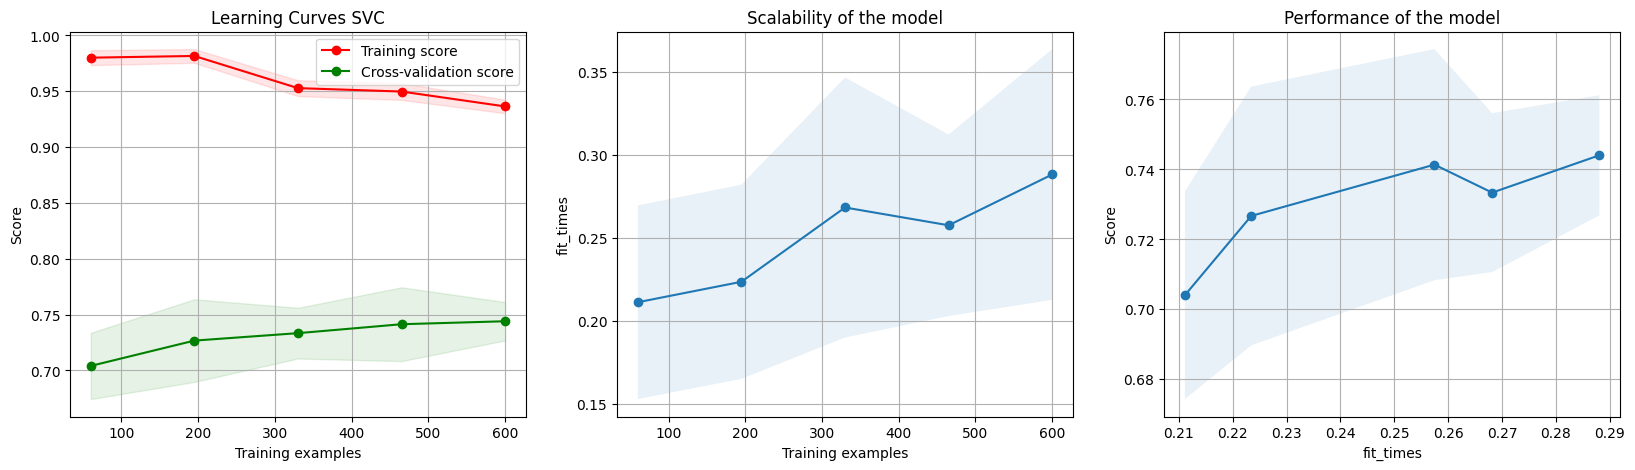

In [60]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves SVC', X_train, y_train, n_jobs=-1)

In [61]:
print(loaded_best_estimator_round1.score(X_train, y_train))

print(loaded_complete_grid_round1.best_score_)

0.9333333333333333
0.744


In [62]:
param_grid_2 = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['poly', 'rbf']
}

halving_svc_1 = HalvingGridSearchCV(pipeline_1, param_grid=param_grid_2, factor=3,cv=5, return_train_score=True)

In [63]:
halving_svc_1.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('rare_label_encoder',
                                               RareLabelEncoder(variables=['credit_history',
                                                                           'purpose',
                                                                           'savings_status',
                                                                           'personal_status',
                                                                           'other_parties',
                                                                           'other_payment_plans',
                                                                           'job'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['checking_status',
                                                                        'credit_history',
                                                                        'purpose',
                                                                        'savings_status',
                                                                        'empl...
                                                                        'existing_credits',
                                                                        'num_dependents'])),
                                              ('log_transformer',
                                               LogTransformer(variables=['duration',
                                                                         'credit_amount',
                                                                         'age'])),
                                              ('scalar',
                                               SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                         variables=['duration',
                                                                                    'credit_amount',
                                                                                    'age'])),
                                              ('convert_to_numpy',
                                               ConvertToNumpyArray()),
                                              ('svc', SVC())]),
                    param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                                'svc__kernel': ['poly', 'rbf']})

In [64]:
print(halving_svc_1.best_params_)

{'svc__C': 10, 'svc__kernel': 'rbf'}


In [65]:
file_best_estimator_round2 = save_model_folder / 'svc_round2_best_estimator.pkl'

file_complete_grid_round2 = save_model_folder / 'svc_round2_complete_grid.pkl'

In [66]:
joblib.dump(halving_svc_1.best_estimator_, file_best_estimator_round2)

joblib.dump(halving_svc_1, file_complete_grid_round2)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svc_round2_complete_grid.pkl']

In [67]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)

loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

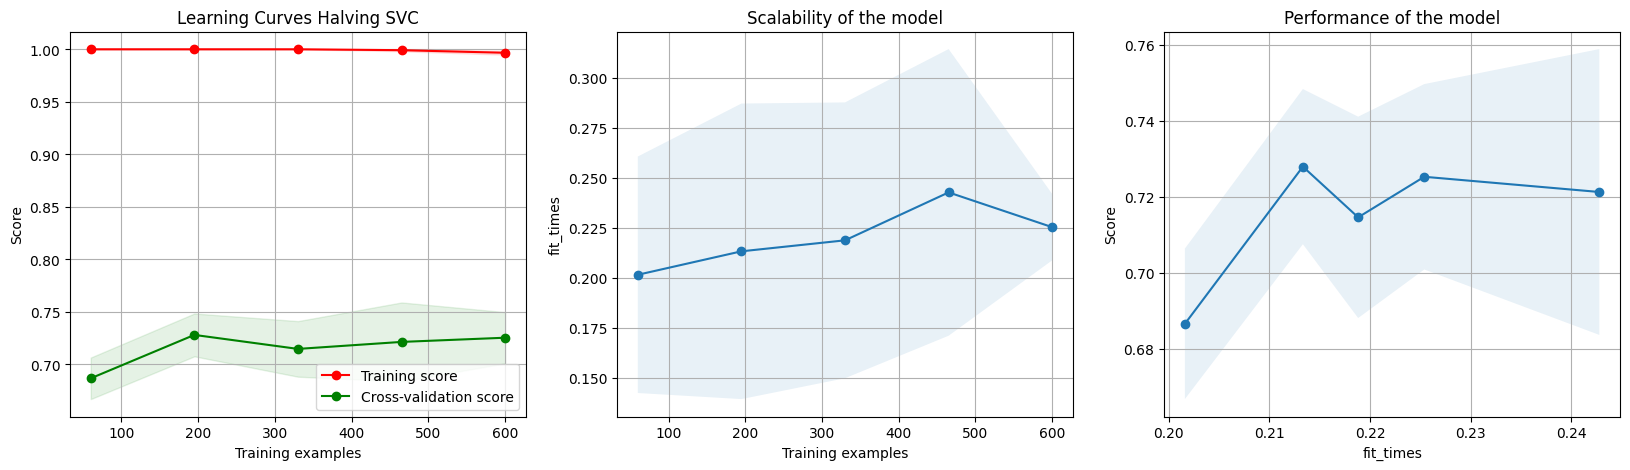

In [68]:
plot_learning_curve(loaded_best_estimator_round2, 'Learning Curves Halving SVC', X_train, y_train, n_jobs=-1)

In [69]:
print(loaded_best_estimator_round2.score(X_train, y_train))

print(loaded_complete_grid_round2.best_score_)

0.9946666666666667
0.723489932885906


In [70]:
param_grid_3 = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['poly', 'rbf'],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}

halving_svc_2 = HalvingGridSearchCV(pipeline_1, param_grid=param_grid_3, factor=3,cv=5, return_train_score=True)

In [71]:
halving_svc_2.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('rare_label_encoder',
                                               RareLabelEncoder(variables=['credit_history',
                                                                           'purpose',
                                                                           'savings_status',
                                                                           'personal_status',
                                                                           'other_parties',
                                                                           'other_payment_plans',
                                                                           'job'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['checking_status',
                                                                        'credit_history',
                                                                        'purpose',
                                                                        'savings_status',
                                                                        'empl...
                                              ('log_transformer',
                                               LogTransformer(variables=['duration',
                                                                         'credit_amount',
                                                                         'age'])),
                                              ('scalar',
                                               SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                         variables=['duration',
                                                                                    'credit_amount',
                                                                                    'age'])),
                                              ('convert_to_numpy',
                                               ConvertToNumpyArray()),
                                              ('svc', SVC())]),
                    param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                                'svc__gamma': [0.001, 0.01, 0.1, 1],
                                'svc__kernel': ['poly', 'rbf']})

In [72]:
print(halving_svc_2.best_params_)

{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}


In [73]:
file_best_estimator_round3 = save_model_folder / 'svc_round3_best_estimator.pkl'

file_complete_grid_round3 = save_model_folder / 'svc_round3_complete_grid.pkl'

In [74]:
joblib.dump(halving_svc_2.best_estimator_, file_best_estimator_round3)

joblib.dump(halving_svc_2, file_complete_grid_round3)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svc_round3_complete_grid.pkl']

In [75]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)

loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

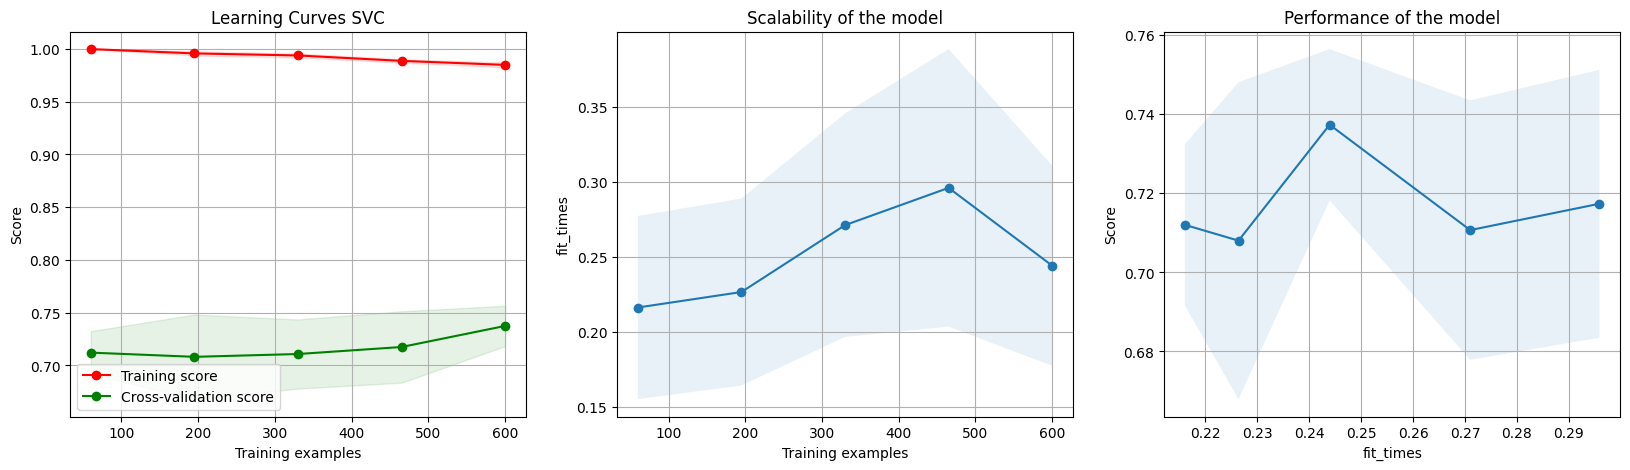

In [76]:
plot_learning_curve(loaded_best_estimator_round3, 'Learning Curves SVC', X_train, y_train, n_jobs=-1)

In [77]:
print(loaded_best_estimator_round3.score(X_train, y_train))

print(loaded_complete_grid_round3.best_score_)

0.9826666666666667
0.7296551724137931


In [78]:
param_grid_4 = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['poly', 'rbf'],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__degree': [2,3,4,5]
}

halving_svc_3 = HalvingGridSearchCV(pipeline_1, param_grid=param_grid_4, factor=3, cv=5, return_train_score=True)

In [79]:
halving_svc_3.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('rare_label_encoder',
                                               RareLabelEncoder(variables=['credit_history',
                                                                           'purpose',
                                                                           'savings_status',
                                                                           'personal_status',
                                                                           'other_parties',
                                                                           'other_payment_plans',
                                                                           'job'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['checking_status',
                                                                        'credit_history',
                                                                        'purpose',
                                                                        'savings_status',
                                                                        'empl...
                                               LogTransformer(variables=['duration',
                                                                         'credit_amount',
                                                                         'age'])),
                                              ('scalar',
                                               SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                         variables=['duration',
                                                                                    'credit_amount',
                                                                                    'age'])),
                                              ('convert_to_numpy',
                                               ConvertToNumpyArray()),
                                              ('svc', SVC())]),
                    param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                                'svc__degree': [2, 3, 4, 5],
                                'svc__gamma': [0.001, 0.01, 0.1, 1],
                                'svc__kernel': ['poly', 'rbf']})

In [80]:
print(halving_svc_3.best_params_)

{'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [81]:
file_best_estimator_round4 = save_model_folder / 'svc_round4_best_estimator.pkl'

file_complete_grid_round4 = save_model_folder / 'svc_round4_complete_grid.pkl'

In [82]:
joblib.dump(halving_svc_3.best_estimator_, file_best_estimator_round4)

joblib.dump(halving_svc_3, file_complete_grid_round4)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svc_round4_complete_grid.pkl']

In [83]:
loaded_best_estimator_round4 = joblib.load(file_best_estimator_round4)

loaded_complete_grid_round4 = joblib.load(file_complete_grid_round4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

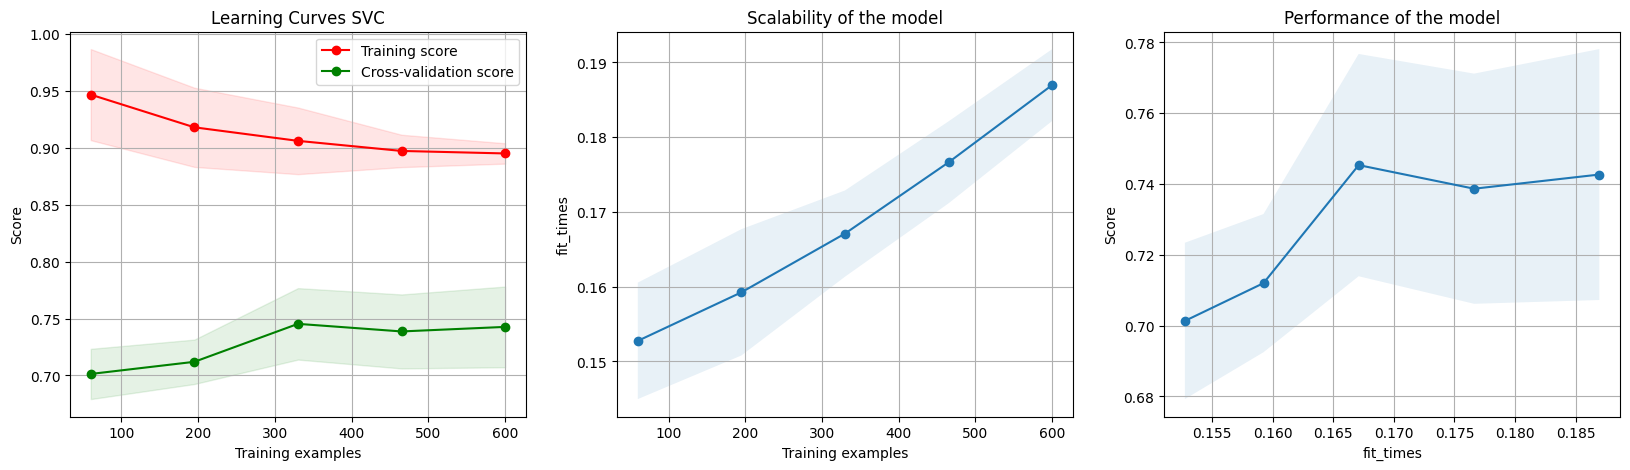

In [84]:
plot_learning_curve(loaded_best_estimator_round4, 'Learning Curves SVC', X_train, y_train, n_jobs=-1)

In [85]:
print(loaded_best_estimator_round4.score(X_train, y_train))

print(loaded_complete_grid_round4.best_score_)

0.8933333333333333
0.7203703703703704


In [86]:
param_grid_5 = {
    'svc__C': [1, 10, 100, 1000],
    'svc__kernel': ['linear', 'poly', 'rbf']
}

halving_svc_4 = HalvingGridSearchCV(pipeline_1, param_grid=param_grid_5, factor=3, cv=5, return_train_score=True)

In [87]:
halving_svc_4.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('rare_label_encoder',
                                               RareLabelEncoder(variables=['credit_history',
                                                                           'purpose',
                                                                           'savings_status',
                                                                           'personal_status',
                                                                           'other_parties',
                                                                           'other_payment_plans',
                                                                           'job'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['checking_status',
                                                                        'credit_history',
                                                                        'purpose',
                                                                        'savings_status',
                                                                        'empl...
                                                                        'existing_credits',
                                                                        'num_dependents'])),
                                              ('log_transformer',
                                               LogTransformer(variables=['duration',
                                                                         'credit_amount',
                                                                         'age'])),
                                              ('scalar',
                                               SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                         variables=['duration',
                                                                                    'credit_amount',
                                                                                    'age'])),
                                              ('convert_to_numpy',
                                               ConvertToNumpyArray()),
                                              ('svc', SVC())]),
                    param_grid={'svc__C': [1, 10, 100, 1000],
                                'svc__kernel': ['linear', 'poly', 'rbf']})

In [88]:
print(halving_svc_4.best_params_)

{'svc__C': 1, 'svc__kernel': 'poly'}


In [89]:
file_best_estimator_round5 = save_model_folder / 'svc_round5_best_estimator.pkl'

file_complete_grid_round5 = save_model_folder / 'svc_round5_complete_grid.pkl'

In [90]:
joblib.dump(halving_svc_4.best_estimator_, file_best_estimator_round5)

joblib.dump(halving_svc_4, file_complete_grid_round5)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svc_round5_complete_grid.pkl']

In [91]:
loaded_best_estimator_round5 = joblib.load(file_best_estimator_round5)

loaded_complete_grid_round5 = joblib.load(file_complete_grid_round5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

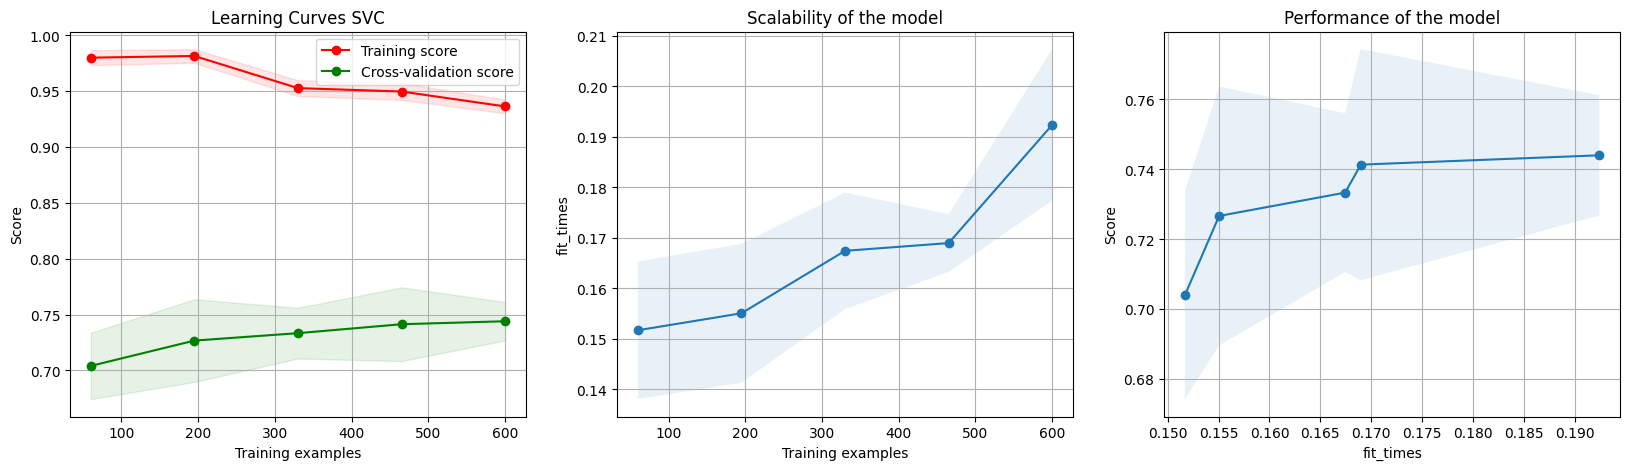

In [92]:
plot_learning_curve(loaded_best_estimator_round5, 'Learning Curves SVC', X_train, y_train, n_jobs=-1)

In [93]:
print(loaded_best_estimator_round5.score(X_train, y_train))

print(loaded_complete_grid_round5.best_score_)

0.9333333333333333
0.7328859060402684


- When comparing KNN Classifier vs Logistic Regression and Support Vector Classifier (SVC), KNN Classifier achieves a training score of 80% and 73%, - we can see that it overfits the data, and Logistic Regression, got a score of 77.6% and 73.4% of training and cv score respectively, whereas, Support Vector Classifier (SVC) heavily overfits in almost every hyperparameter tuning cycle, so Support Vector Classifier with both poly and rbf kernel overfits the data, but from the learning curve we can see that it converges as the data size increases. So maybe by increasing the data size, SVC might be a good classifier, but for now Logistic Regression with is effective.

# Question2 (10 Points) : SVR on Bike Sharing Dataset

- Download the data from following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand'

- **Use RandomSerachCV(OR HalvingGridsearchCV, HalvingRandomSerachCV)**



In [94]:
data = pd.read_csv('/content/drive/MyDrive/BUAN6341/HW4/datasets/SeoulBikeData.csv', encoding='latin-1')

In [95]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [96]:
data = data.drop('Date', axis=1)

In [97]:
X = data.iloc[:, 1:]

In [98]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [99]:
y = data.iloc[:,0]

In [100]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 821.4+ KB


In [102]:
X.nunique()

Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [103]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [104]:
dups = X.duplicated()

print(dups.any())

False


In [105]:
X.isnull().sum()

Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [106]:
X.isnull().any()

Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

In [107]:
X.isnull().mean() * 100

Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

In [108]:
categorical = [var for var in X.columns if X[var].dtype.name == 'object']

discrete = [
    var for var in X.columns if X[var].dtype.name != 'object'
    and len(X[var].unique()) < 20
]

# Create a list of continuous Variables
continuous = [
    var for var in X.columns if X[var].dtype.name != 'object'
    if var not in discrete
]

In [109]:
categorical

['Seasons', 'Holiday', 'Functioning Day']

In [110]:
discrete

[]

In [111]:
continuous

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [112]:
total_unique_values= X[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Seasons : 4
Holiday : 2
Functioning Day : 2


In [113]:
for var in categorical:
    print(var, X[var].unique(), '\n')

Seasons ['Winter' 'Spring' 'Summer' 'Autumn'] 

Holiday ['No Holiday' 'Holiday'] 

Functioning Day ['Yes' 'No'] 



In [114]:
total_unique_values= X[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Hour : 24
Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51


In [115]:
for var in continuous:
    print(var, X[var].unique()[0:20], '\n')

Hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Temperature(°C) [-5.2 -5.5 -6.  -6.2 -6.4 -6.6 -7.4 -7.6 -6.5 -3.5 -0.5  1.7  2.4  3.
  2.1  1.2  0.8  0.6  0.  -0.3] 

Humidity(%) [37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84] 

Wind speed (m/s) [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2 1.4 1.6 2.  3.2 4.2 1.7 0.6 2.1
 2.5 1.8] 

Visibility (10m) [2000 1928 1996 1936  793 1913 1687 1380 1265  994  990 1256 1221 1167
 1202 1178 1276 1436 1487 1309] 

Dew point temperature(°C) [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2 -17.2 -15.6
 -14.6 -11.4  -7.   -6.5  -5.   -3.5  -3.6  -3.4] 

Solar Radiation (MJ/m2) [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06] 

Rainfall(mm) [0.  0.5 1.  2.5 0.1 0.2 0.3 0.7 1.6 0.4 1.1 6.4 9.5 3.5 0.9 3.3 1.4 1.5
 3.7 4.5] 

Snowfall (cm) [0.  0.1 0.3 0.4 0.2 1.  0.9 0.8 0.7 0.6 2.7 4.  4.1 4.3 3.9 3.1 2.1 1.4
 0.5 1.3] 



In [116]:
def check_rare(var):
  cat_freq = 100 * X[var].value_counts(normalize=True)
  fig = cat_freq.sort_values(ascending=False).plot.bar()
  fig.axhline(y=5, color='red')
  fig.set_ylabel('category percentage frequency')
  fig.set_xlabel(var)
  fig.set_title('Identifying Rare Categories')
  plt.show()

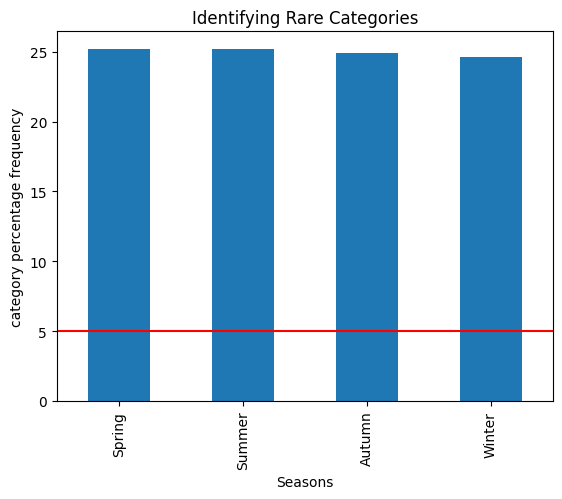

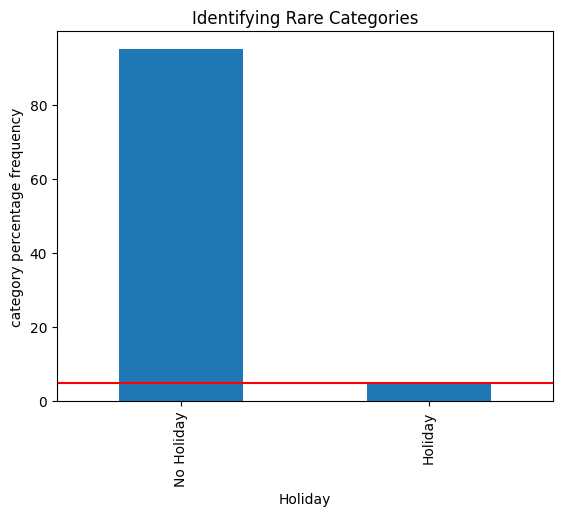

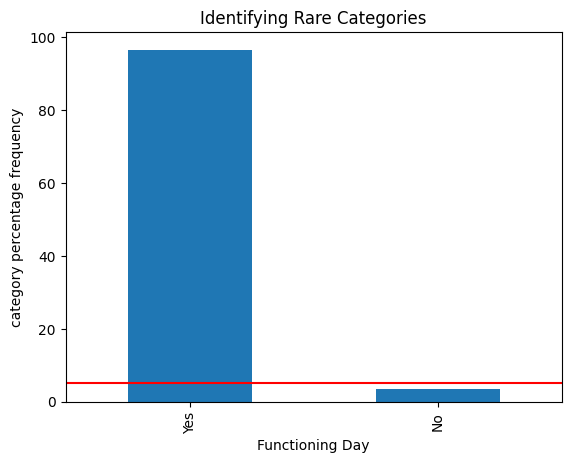

In [117]:
for var in categorical:
  check_rare(var)

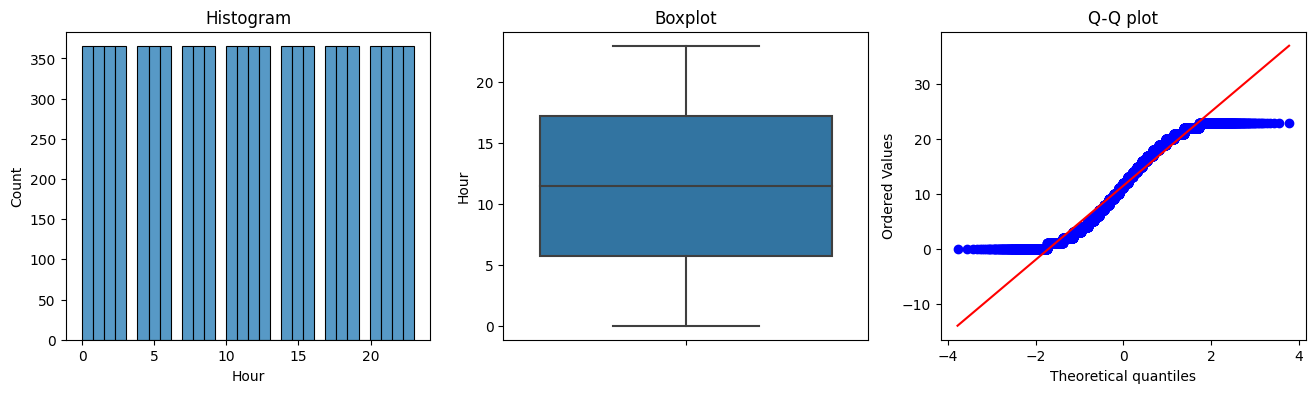

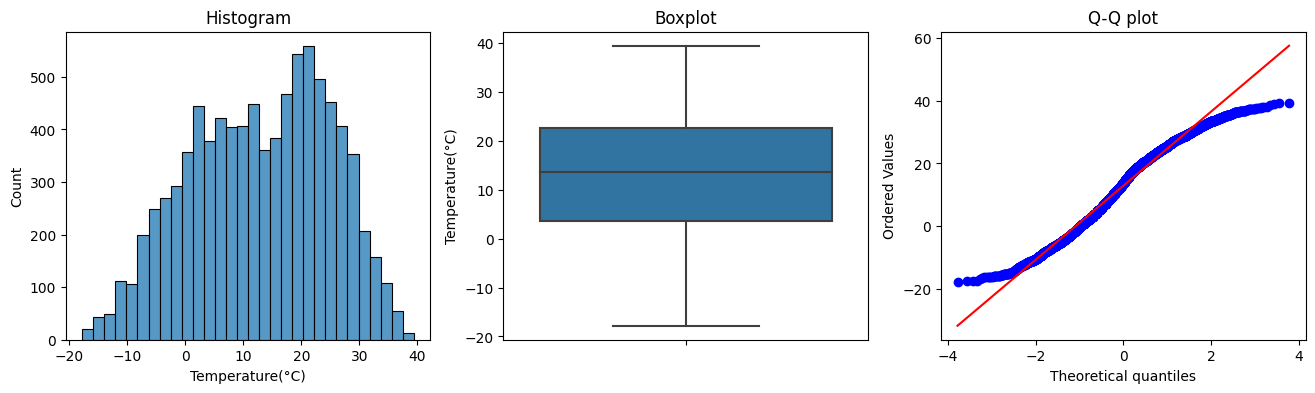

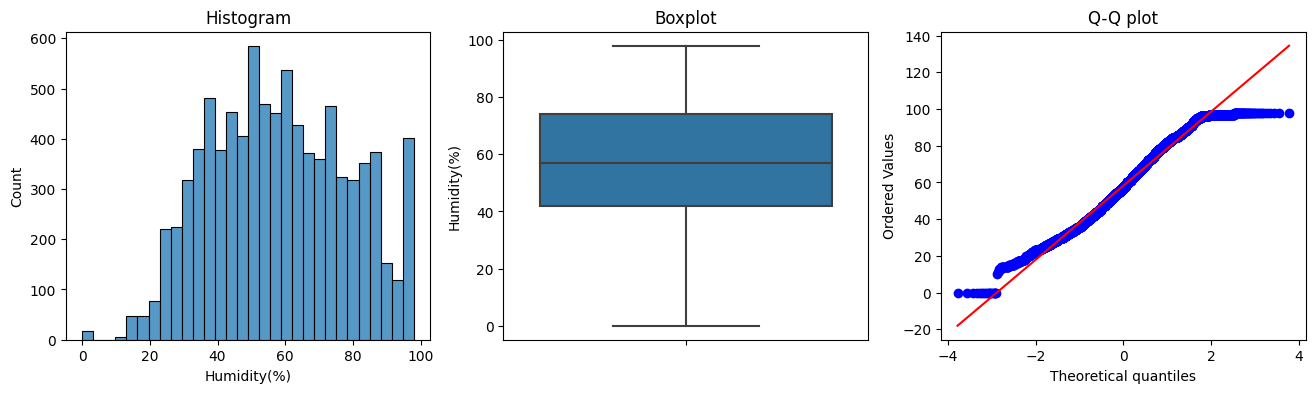

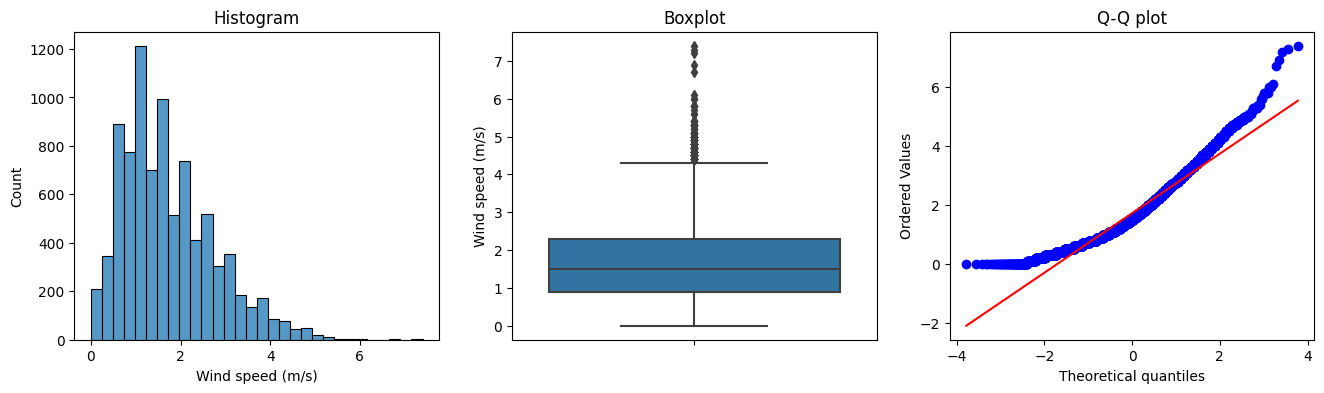

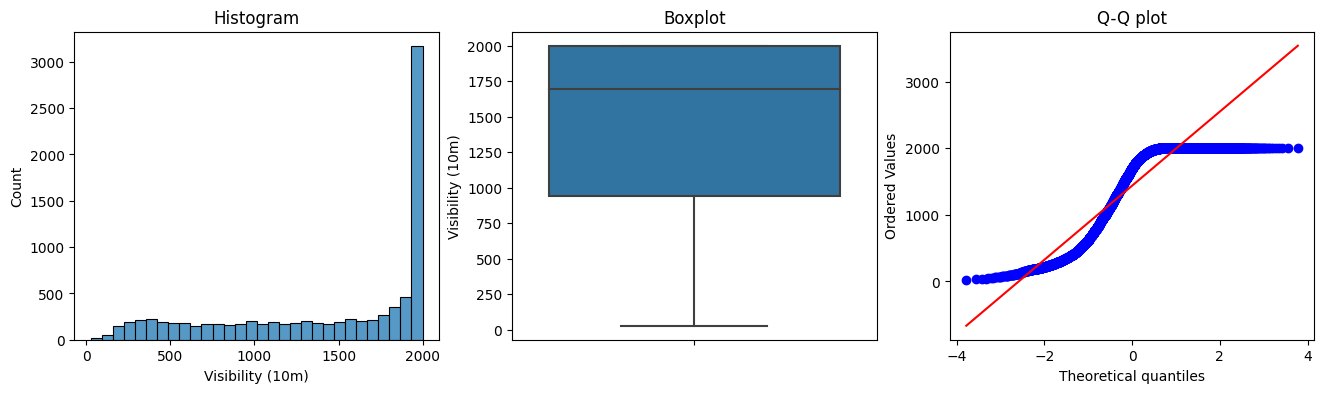

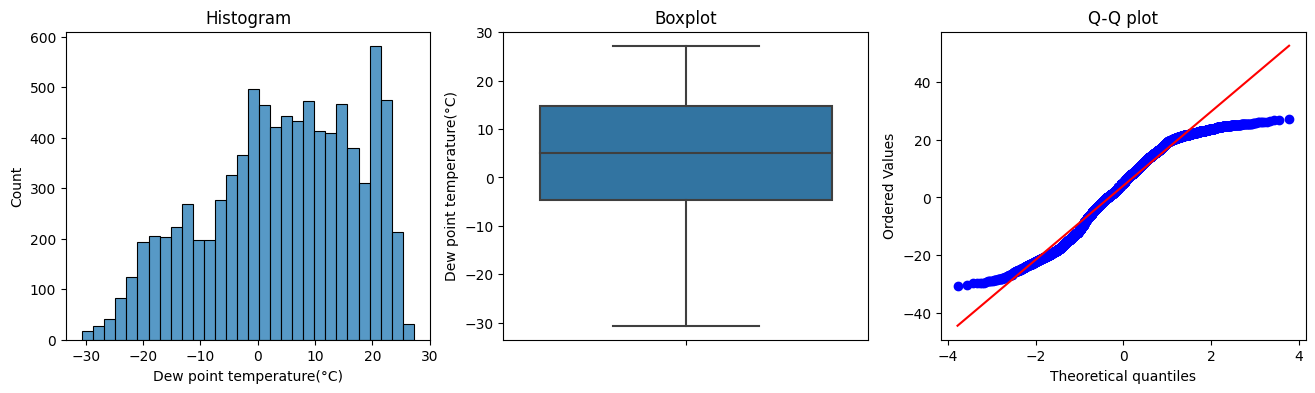

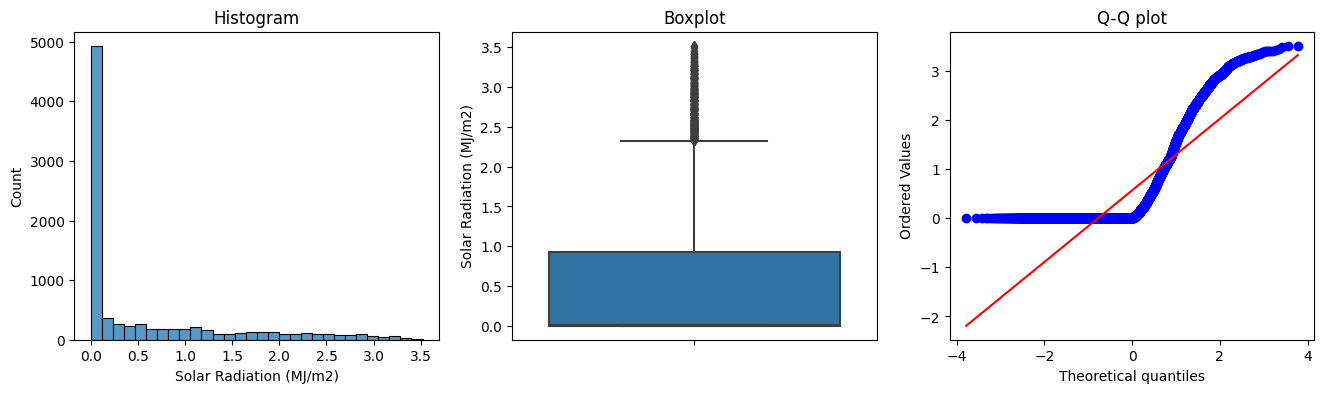

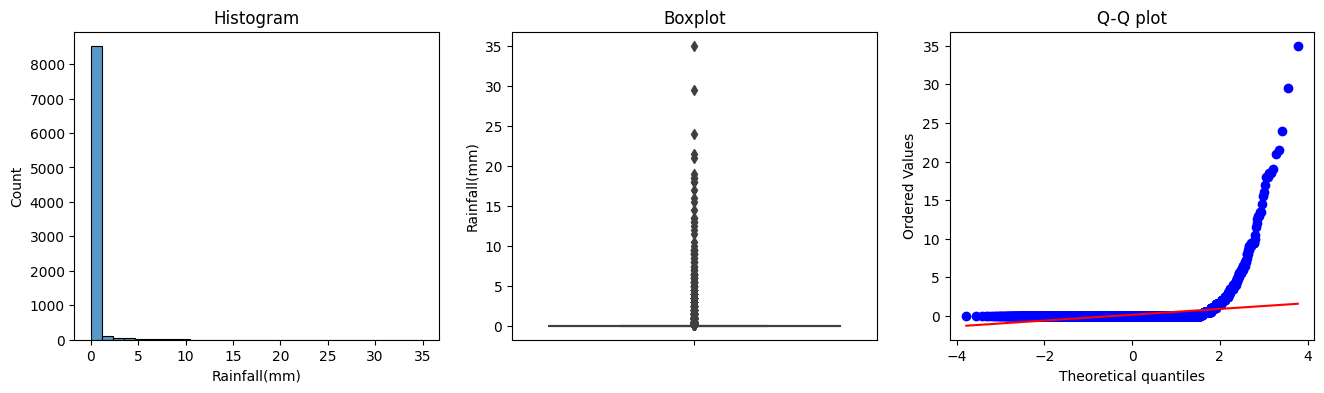

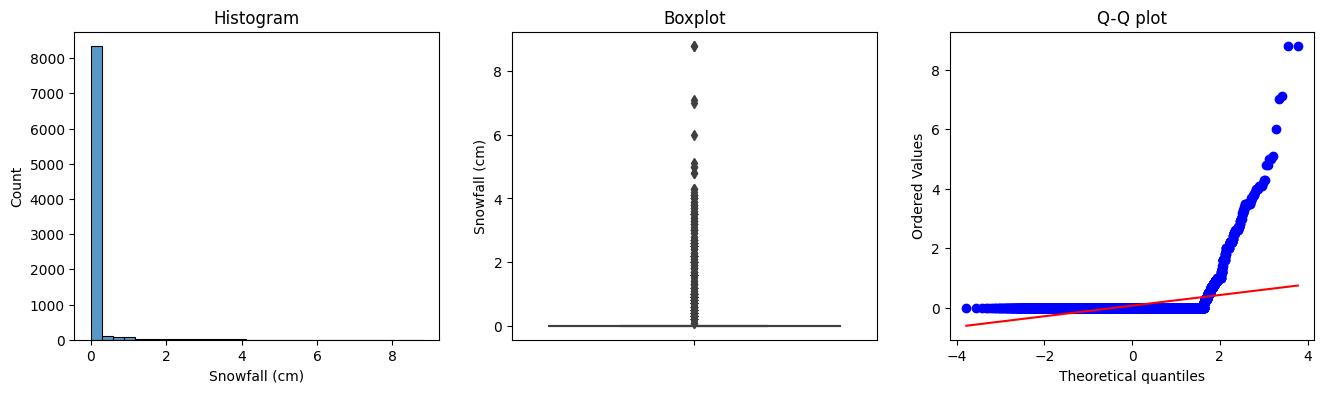

In [118]:
for var in continuous:
    diagnostic_plots(X, var)

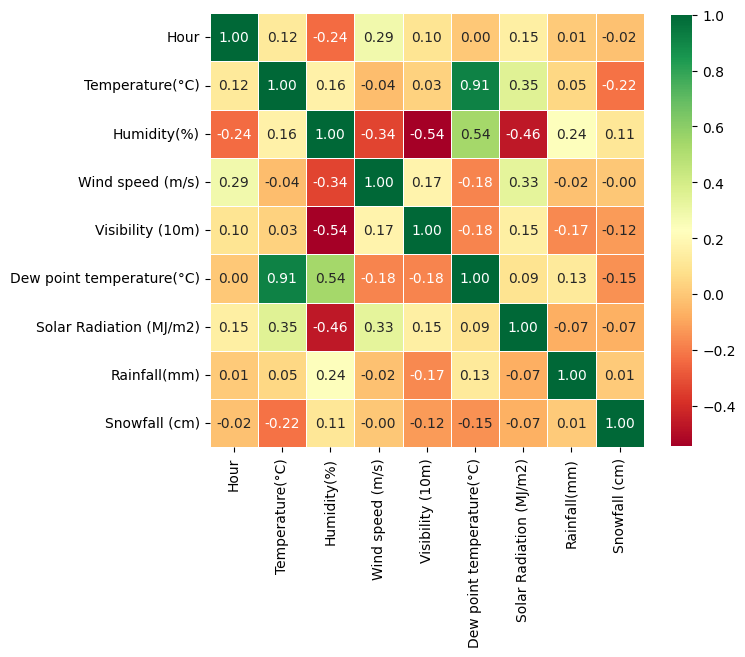

In [119]:
corrmat = X[continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(X[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [121]:
columns_to_drop = ['Dew point temperature(°C)']
one_hot_encoder_cols = ['Seasons', 'Holiday', 'Functioning Day']
rare_label_encoder_cols = ['Functioning Day']
yeo_transformer_cols = ['Visibility (10m)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

pipeline_2 = Pipeline([
    ('drop_features', DropFeatures(columns_to_drop)),
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=yeo_transformer_cols)),
    ('svr', SVR())
])

In [122]:
param_grid_6 = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__kernel': ['poly', 'rbf']
}

random_linear_1 = RandomizedSearchCV(pipeline_2, param_distributions=param_grid_6, cv=5, return_train_score=True)

In [123]:
random_linear_1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_features',
                                              DropFeatures(features_to_drop=['Dew '
                                                                             'point '
                                                                             'temperature(°C)'])),
                                             ('rare_label_encoder',
                                              RareLabelEncoder(n_categories=2,
                                                               variables=['Functioning '
                                                                          'Day'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(drop_last=True,
                                                            ignore_format=True,
                                                            variables=['Seasons',
                                                                       'Holiday',
                                                                       'Functioning '
                                                                       'Day'])),
                                             ('yeo_tranformer',
                                              YeoJohnsonTransformer(variables=['Visibility '
                                                                               '(10m)',
                                                                               'Wind '
                                                                               'speed '
                                                                               '(m/s)',
                                                                               'Solar '
                                                                               'Radiation '
                                                                               '(MJ/m2)',
                                                                               'Rainfall(mm)',
                                                                               'Snowfall '
                                                                               '(cm)'])),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': [0.1, 1, 10, 100],
                                        'svr__kernel': ['poly', 'rbf']},
                   return_train_score=True)

In [124]:
print(random_linear_1.best_params_)

{'svr__kernel': 'rbf', 'svr__C': 100}


In [125]:
file_best_estimator_round6 = save_model_folder / 'svr_round1_best_estimator.pkl'

file_complete_grid_round6 = save_model_folder / 'svr_round1_complete_grid.pkl'

In [126]:
joblib.dump(random_linear_1.best_estimator_, file_best_estimator_round6)

joblib.dump(random_linear_1, file_complete_grid_round6)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svr_round1_complete_grid.pkl']

In [127]:
loaded_best_estimator_round6 = joblib.load(file_best_estimator_round6)

loaded_complete_grid_round6 = joblib.load(file_complete_grid_round6)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

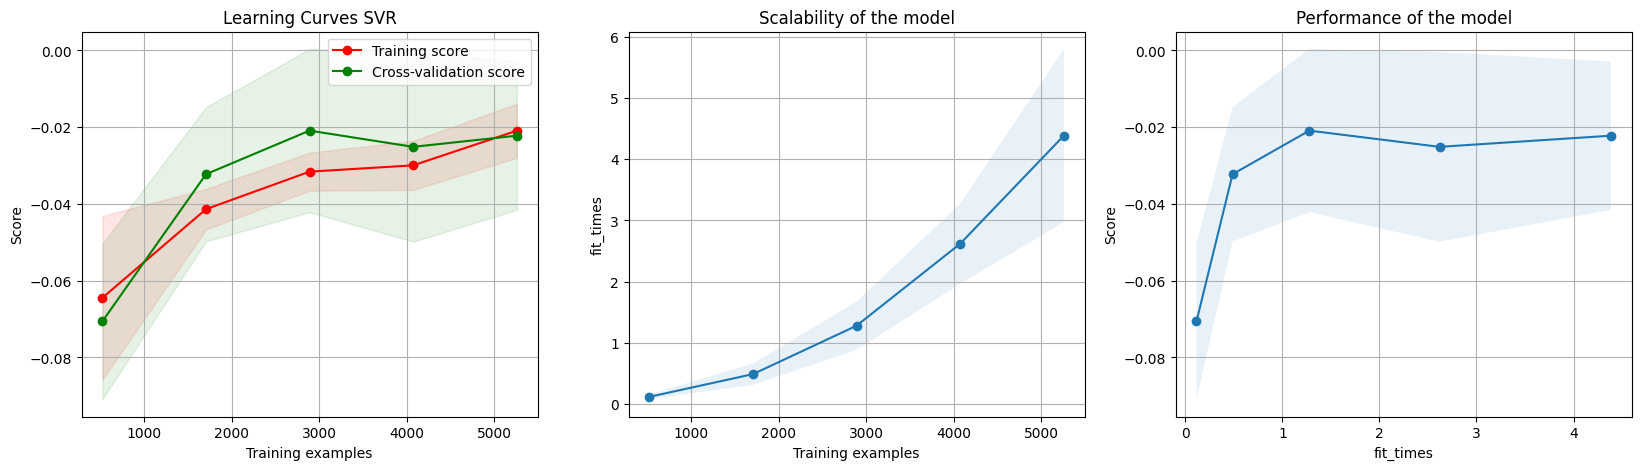

In [128]:
plot_learning_curve(loaded_best_estimator_round6, 'Learning Curves SVR', X_train, y_train, n_jobs=-1)

In [129]:
print(loaded_best_estimator_round6.score(X_train, y_train))

print(loaded_complete_grid_round6.best_score_)

-0.02103605118681373
-0.02221691980183189


In [130]:
param_grid_7 = {
    'svr__C': [0.01, 0.1, 1, 10, 100],
    'svr__kernel': ['poly', 'rbf'],
    'svr__degree': [2,3,4]
}

random_linear_2 = HalvingGridSearchCV(pipeline_2, param_grid=param_grid_7, cv=5, return_train_score=True)

In [131]:
random_linear_2.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('drop_features',
                                               DropFeatures(features_to_drop=['Dew '
                                                                              'point '
                                                                              'temperature(°C)'])),
                                              ('rare_label_encoder',
                                               RareLabelEncoder(n_categories=2,
                                                                variables=['Functioning '
                                                                           'Day'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['Seasons',
                                                                        'Holiday',
                                                                        'Functioning '
                                                                        'Day'])),
                                              ('yeo_tranformer',
                                               YeoJohnsonTransformer(variables=['Visibility '
                                                                                '(10m)',
                                                                                'Wind '
                                                                                'speed '
                                                                                '(m/s)',
                                                                                'Solar '
                                                                                'Radiation '
                                                                                '(MJ/m2)',
                                                                                'Rainfall(mm)',
                                                                                'Snowfall '
                                                                                '(cm)'])),
                                              ('svr', SVR())]),
                    param_grid={'svr__C': [0.01, 0.1, 1, 10, 100],
                                'svr__degree': [2, 3, 4],
                                'svr__kernel': ['poly', 'rbf']})

In [132]:
print(random_linear_2.best_params_)

{'svr__C': 100, 'svr__degree': 3, 'svr__kernel': 'rbf'}


In [133]:
file_best_estimator_round7 = save_model_folder / 'svr_round2_best_estimator.pkl'

file_complete_grid_round7 = save_model_folder / 'svr_round2_complete_grid.pkl'

In [134]:
joblib.dump(random_linear_2.best_estimator_, file_best_estimator_round7)

joblib.dump(random_linear_2, file_complete_grid_round7)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svr_round2_complete_grid.pkl']

In [135]:
loaded_best_estimator_round7 = joblib.load(file_best_estimator_round7)

loaded_complete_grid_round7 = joblib.load(file_complete_grid_round7)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

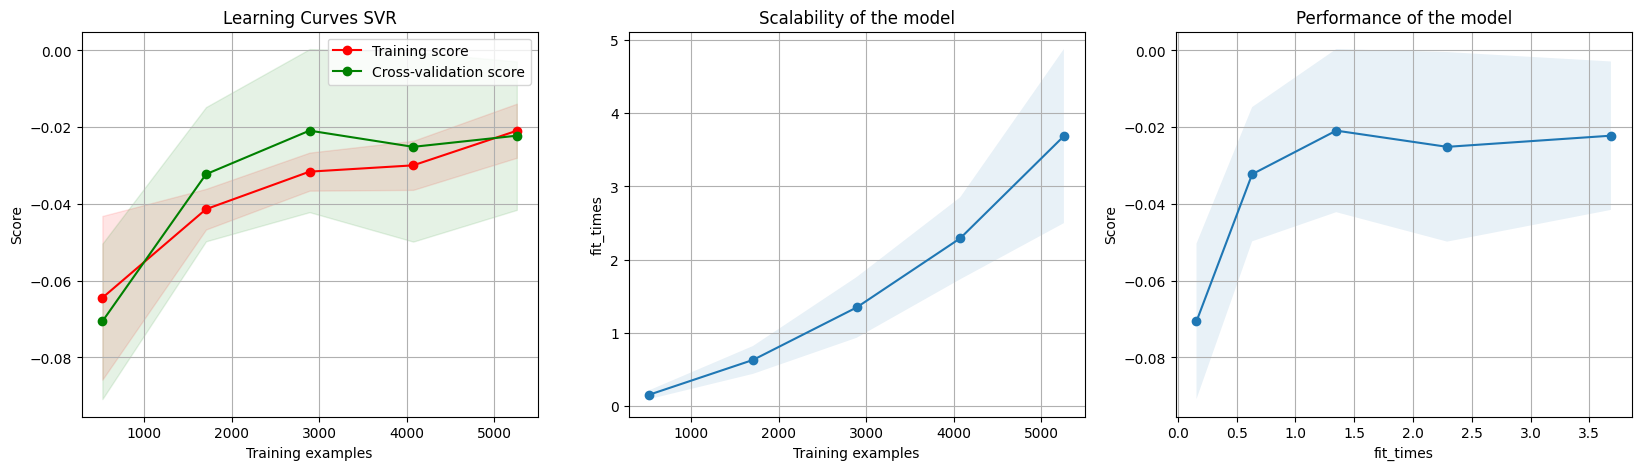

In [136]:
plot_learning_curve(loaded_best_estimator_round7, 'Learning Curves SVR', X_train, y_train, n_jobs=-1)

In [137]:
print(loaded_best_estimator_round7.score(X_train, y_train))

print(loaded_complete_grid_round7.best_score_)

-0.02103605118681373
-0.021887086649235266


In [138]:
param_grid_8 = {
    'svr__C': [0.01, 0.1, 1],
    'svr__kernel': ['poly', 'rbf'],
    'svr__degree': [2,3,4]
}

random_linear_3 = HalvingGridSearchCV(pipeline_2, param_grid=param_grid_8, cv=5, factor=3, return_train_score=True)

In [139]:
random_linear_3.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('drop_features',
                                               DropFeatures(features_to_drop=['Dew '
                                                                              'point '
                                                                              'temperature(°C)'])),
                                              ('rare_label_encoder',
                                               RareLabelEncoder(n_categories=2,
                                                                variables=['Functioning '
                                                                           'Day'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['Seasons',
                                                                        'Holiday',
                                                                        'Functioning '
                                                                        'Day'])),
                                              ('yeo_tranformer',
                                               YeoJohnsonTransformer(variables=['Visibility '
                                                                                '(10m)',
                                                                                'Wind '
                                                                                'speed '
                                                                                '(m/s)',
                                                                                'Solar '
                                                                                'Radiation '
                                                                                '(MJ/m2)',
                                                                                'Rainfall(mm)',
                                                                                'Snowfall '
                                                                                '(cm)'])),
                                              ('svr', SVR())]),
                    param_grid={'svr__C': [0.01, 0.1, 1],
                                'svr__degree': [2, 3, 4],
                                'svr__kernel': ['poly', 'rbf']})

In [140]:
print(random_linear_3.best_params_)

{'svr__C': 1, 'svr__degree': 3, 'svr__kernel': 'poly'}


In [141]:
file_best_estimator_round8 = save_model_folder / 'svr_round3_best_estimator.pkl'

file_complete_grid_round8 = save_model_folder / 'svr_round3_complete_grid.pkl'

In [142]:
joblib.dump(random_linear_3.best_estimator_, file_best_estimator_round8)

joblib.dump(random_linear_3, file_complete_grid_round8)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svr_round3_complete_grid.pkl']

In [143]:
loaded_best_estimator_round8 = joblib.load(file_best_estimator_round8)

loaded_complete_grid_round8 = joblib.load(file_complete_grid_round8)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

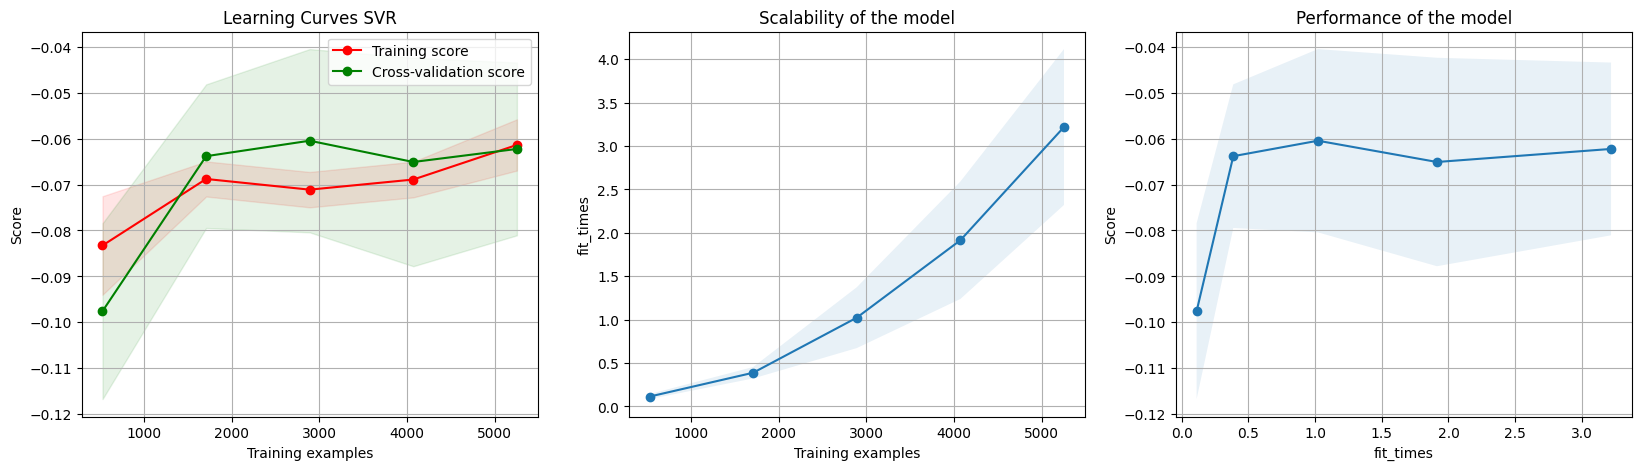

In [144]:
plot_learning_curve(loaded_best_estimator_round8, 'Learning Curves SVR', X_train, y_train, n_jobs=-1)

In [145]:
print(loaded_best_estimator_round8.score(X_train, y_train))

print(loaded_complete_grid_round8.best_score_)

-0.05943374283230729
-0.06222927677807766


In [146]:
param_grid_9 = {
    'svr__C': [1, 10, 100, 1000],
    'svr__kernel': ['poly', 'rbf'],
    'svr__epsilon': [0.01, 0.1, 0.2]
}

random_linear_4 = HalvingGridSearchCV(pipeline_2, param_grid=param_grid_9, cv=5, factor=3, return_train_score=True)

In [147]:
random_linear_4.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('drop_features',
                                               DropFeatures(features_to_drop=['Dew '
                                                                              'point '
                                                                              'temperature(°C)'])),
                                              ('rare_label_encoder',
                                               RareLabelEncoder(n_categories=2,
                                                                variables=['Functioning '
                                                                           'Day'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['Seasons',
                                                                        'Holiday',
                                                                        'Functioning '
                                                                        'Day'])),
                                              ('yeo_tranformer',
                                               YeoJohnsonTransformer(variables=['Visibility '
                                                                                '(10m)',
                                                                                'Wind '
                                                                                'speed '
                                                                                '(m/s)',
                                                                                'Solar '
                                                                                'Radiation '
                                                                                '(MJ/m2)',
                                                                                'Rainfall(mm)',
                                                                                'Snowfall '
                                                                                '(cm)'])),
                                              ('svr', SVR())]),
                    param_grid={'svr__C': [1, 10, 100, 1000],
                                'svr__epsilon': [0.01, 0.1, 0.2],
                                'svr__kernel': ['poly', 'rbf']})

In [148]:
print(random_linear_4.best_params_)

{'svr__C': 1000, 'svr__epsilon': 0.2, 'svr__kernel': 'rbf'}


In [149]:
file_best_estimator_round9 = save_model_folder / 'svr_round4_best_estimator.pkl'

file_complete_grid_round9 = save_model_folder / 'svr_round4_complete_grid.pkl'

In [150]:
joblib.dump(random_linear_4.best_estimator_, file_best_estimator_round9)

joblib.dump(random_linear_4, file_complete_grid_round9)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svr_round4_complete_grid.pkl']

In [151]:
loaded_best_estimator_round9 = joblib.load(file_best_estimator_round9)

loaded_complete_grid_round9 = joblib.load(file_complete_grid_round9)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

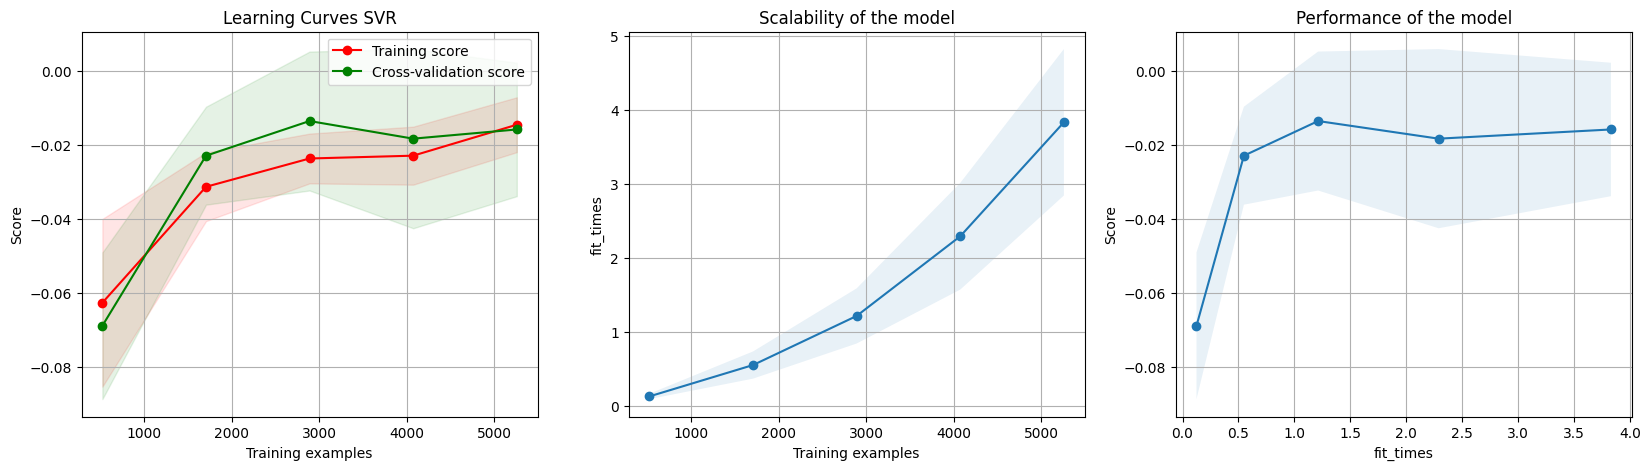

In [152]:
plot_learning_curve(loaded_best_estimator_round9, 'Learning Curves SVR', X_train, y_train, n_jobs=-1)

In [153]:
print(loaded_best_estimator_round9.score(X_train, y_train))

print(loaded_complete_grid_round9.best_score_)

-0.014203234118736585
-0.015760069639339225


In [154]:
param_grid_10 = {
    'svr__C': [1000, 10000, 100000],
    'svr__kernel': ['poly', 'rbf'],
    'svr__epsilon': [0.01, 0.1, 0.2]
}

random_linear_5 = HalvingGridSearchCV(pipeline_2, param_grid=param_grid_10, cv=5, factor=3, return_train_score=True)

In [155]:
random_linear_5.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('drop_features',
                                               DropFeatures(features_to_drop=['Dew '
                                                                              'point '
                                                                              'temperature(°C)'])),
                                              ('rare_label_encoder',
                                               RareLabelEncoder(n_categories=2,
                                                                variables=['Functioning '
                                                                           'Day'])),
                                              ('one_hot_encoder',
                                               OneHotEncoder(drop_last=True,
                                                             ignore_format=True,
                                                             variables=['Seasons',
                                                                        'Holiday',
                                                                        'Functioning '
                                                                        'Day'])),
                                              ('yeo_tranformer',
                                               YeoJohnsonTransformer(variables=['Visibility '
                                                                                '(10m)',
                                                                                'Wind '
                                                                                'speed '
                                                                                '(m/s)',
                                                                                'Solar '
                                                                                'Radiation '
                                                                                '(MJ/m2)',
                                                                                'Rainfall(mm)',
                                                                                'Snowfall '
                                                                                '(cm)'])),
                                              ('svr', SVR())]),
                    param_grid={'svr__C': [1000, 10000, 100000],
                                'svr__epsilon': [0.01, 0.1, 0.2],
                                'svr__kernel': ['poly', 'rbf']})

In [156]:
print(random_linear_5.best_params_)

{'svr__C': 10000, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


In [157]:
file_best_estimator_round10 = save_model_folder / 'svr_round5_best_estimator.pkl'

file_complete_grid_round10 = save_model_folder / 'svr_round5_complete_grid.pkl'

In [158]:
joblib.dump(random_linear_5.best_estimator_, file_best_estimator_round10)

joblib.dump(random_linear_5, file_complete_grid_round10)

['/content/drive/MyDrive/BUAN6341/HW6/models/machine_learning/svr_round5_complete_grid.pkl']

In [159]:
loaded_best_estimator_round10 = joblib.load(file_best_estimator_round10)

loaded_complete_grid_round10 = joblib.load(file_complete_grid_round10)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

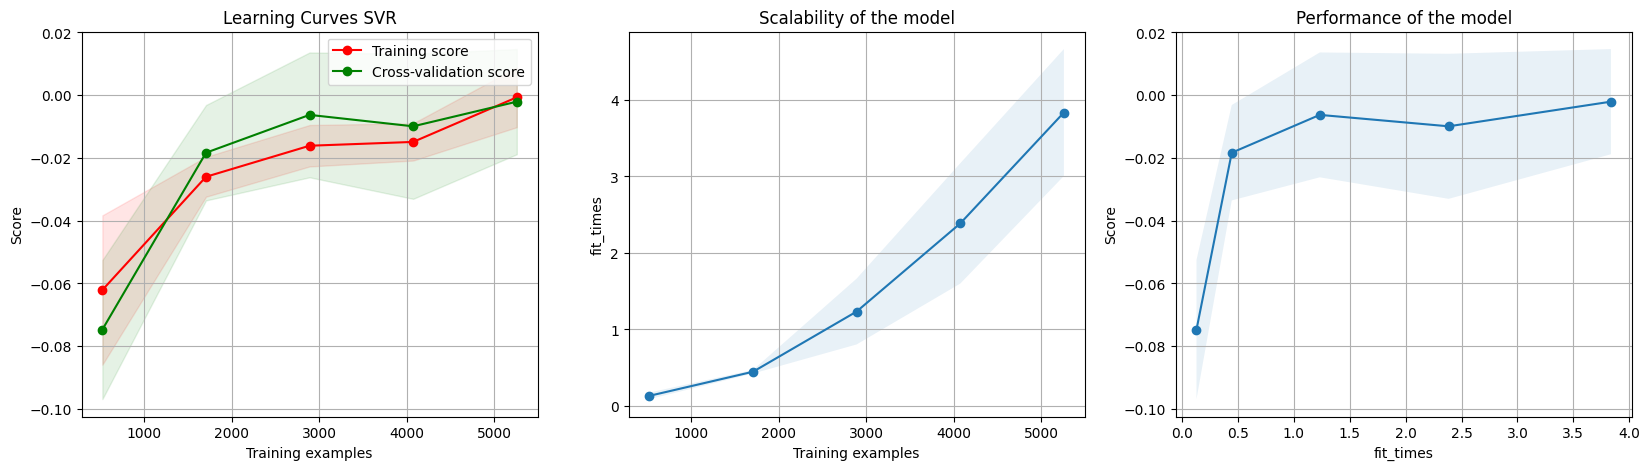

In [160]:
plot_learning_curve(loaded_best_estimator_round10, 'Learning Curves SVR', X_train, y_train, n_jobs=-1)

In [161]:
print(loaded_best_estimator_round10.score(X_train, y_train))

print(loaded_complete_grid_round10.best_score_)

0.0010242471969512668
-0.0020697091355553754



-  Compare KNN and Linear Regression.(previous HWs)  Basd on your anaysis which algorithm you will recommend.
- The aim of the piepline is to predict the rented bike count.


- Comparing the KNN Regressor, Linear Regressor, and Support Vector Regressor, we can see that KNN Regressor has a pretty high training and cross validation score of 86 % and 78 % resp. whereas, Linear Regressor has a training and cross validation score of 56.8% and 56.7% resp. and seeing Support Vector Regressor (SVR), after performing a lot of cross validation and hyperparameter tuning by changing the regularization (C) parameter, and increasing it, we tend to get a good score with less overfitting, with a value of C = 100000, we get a training score of 21% and cv score of 18%. So if we keep on increasing the C, we might get a high training and cross validation score, however the dataset is really small, so I would recommend using KNN Regressor for the same